## Import Libraries and Layers

In [1]:
from IPython.display import display
import arcgis
from arcgis.gis import GIS
import pandas as pd
pd.set_option('display.max_columns', 500)
from arcgis.features import FeatureLayer
from arcgis.mapping import WebMap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
gis = GIS("https://datascienceqa.esri.com/portal", "portaladmin", "esri.agp", verify_cert=False)
# gis = GIS("https://datascienceqa.esri.com/portal", "portaladmin", "esri.agp")

In [3]:
# # Layers Used
# # Provider data layer
# provider_layer = FeatureLayer("https://datascienceqa.esri.com/server/rest/services/Hosted/provider_clean_data_geocoded_6_19/FeatureServer/0")

# # Population Density
# from arcgis.mapping import MapImageLayer
# popdensity = MapImageLayer("https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer")

# # Median Income
# medIncome = MapImageLayer("https://datascienceqa.esri.com/portal/sharing/servers/3e5f8ebe5a114a61b7f350e7a1203761/rest/services/USA_Demographics_and_Boundaries_2018/MapServer")

# # Median Age
# medAge = MapImageLayer("https://datascienceqa.esri.com/portal/sharing/servers/e2558ac0c5e04235ad7820773e89d110/rest/services/USA_Demographics_and_Boundaries_2018/MapServer")

# # Health Insurance Coverage
# tx_insurance_state = FeatureLayer("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Health_Insurance_Boundaries/FeatureServer")
# tx_insurance_county = FeatureLayer("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Health_Insurance_Boundaries/FeatureServer/1")
# tx_insurance_tract = FeatureLayer("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Health_Insurance_Boundaries/FeatureServer/2")

# # Fertility layers for State, County and Tract (Percent of women 15 to 50 who had a birth in the past 12 months)
# fertility_state = FeatureLayer("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Fertility_by_Age_Boundaries/FeatureServer/0")
# fertility_county = FeatureLayer("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Fertility_by_Age_Boundaries/FeatureServer/1")
# fertility_tract = FeatureLayer("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Fertility_by_Age_Boundaries/FeatureServer/2")

In [4]:
search_result = gis.content.search('title: provider_data_geocoded_7_30','Feature Layer')
provider_data_item = search_result[0]
provider_data_item

<Item title:"provider_data_geocoded_7_30_CA" type:Feature Layer Collection owner:portaladmin>

In [5]:
provider_data_layer = provider_data_item.layers[0]
provider_data_layer

<FeatureLayer url:"https://datascienceqa.esri.com/server/rest/services/Hosted/provider_data_geocoded_7_30_CA/FeatureServer/0">

## Mental Health Providers and Other Data

#### Create df for Mental Health providers

In [218]:
# Get provider data for obgyn providers only

mental_featureset = provider_data_layer.query(where="user_taxonomy_code_1 in ('2084P0800X','207QG0300X','273R00000X','103T00000X','103TA0400X','103TA0700X','103TC0700X','103TC2200X','103TB0200X','103TC1900X','103TE1000X','103TE1100X','103TF0000X','103TF0200X','103TP2701X','103TH0004X','103TH0100X','103TM1700X','103TM1800X','103TP0016X','103TP0814X','103TP2700X','103TR0400X','103TS0200X','103TW0100X','106E00000X','106S00000X','2084A0401X','2084P0802X','2084B0002X','2084P0804X','2084N0600X','2084D0003X','2084F0202X','2084P0805X','2084H0002X','2084P0005X','2084N0400X','2084N0402X','2084N0008X','2084P2900X','2084P0015X','2084S0012X','2084S0010X','2084V0102X','364SP0808X','364SP0809X','364SP0807X','364SP0810X','364SP0811X','364SP0812X','364SP0813X','283Q00000X','261QM0801X')", out_fields='x,y,user_npi,user_entity_type,user_provider_gender,user_taxonomy_code_1,user_full_address,postal,city,subregion,region,regionabbr')
mental_df = mental_featureset.sdf
mental_df.head()

SHAPE              city  \
0  {"x": -157.75842118599996, "y": 21.38069594300...            Kailua   
1  {"x": -117.35748267199995, "y": 34.09373249300...            Rialto   
2  {"x": -104.81990027499995, "y": 38.84235050400...  Colorado Springs   
3  {"x": -80.26657097299994, "y": 25.771643515000...             Miami   
4  {"x": 144.7754183520001, "y": 13.5051031310000...          Tamuning   

   objectid postal      region regionabbr                    subregion  \
0        50  96734      Hawaii         HI  City and County of Honolulu   
1       110  92376  California         CA        San Bernardino County   
2       113  80903    Colorado         CO               El Paso County   
3       118  33134     Florida         FL            Miami-Dade County   
4       122  96913        Guam         GU                                

  user_entity_type                                  user_full_address  \
0       Individual  642 ULUKAHIKI ST, SUITE 300, KAILUA, HI 967344400   
1       Individual          648 E GLEN OAK ST, , RIALTO, CA 923766648   
2       Individual  224 E WILLAMETTE AVE, , COLORADO SPRINGS, CO 8...   
3     Organization  4343 W FLAGLER ST STE 100, , CORAL GABLES, FL ...   
4       Individual  790 GOV. CARLOS G. CAMACHO RD., , TAMUNING, GU...   

       user_npi user_provider_gender user_taxonomy_code_1           x  \
0  1.366445e+09                    M           2084N0400X -157.758421   
1  1.760501e+09                    F           103T00000X -117.357483   
2  1.023011e+09                    M           103T00000X -104.819900   
3  1.942508e+09                 None           2084P0800X  -80.266571   
4  1.508862e+09                    M           2084P0800X  144.775418   

           y  
0  21.380696  
1  34.093732  
2  38.842351  
3  25.771644  
4  13.505103

In [219]:
mental_df.shape

(304155, 14)

In [35]:
# Create csv of data
mental_df.to_csv('mental_df.csv', index=None, header=True)

NameError: name 'mental_df' is not defined

In [36]:
mental_df = pd.read_csv('mental_df.csv')
mental_df.shape

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(304155, 14)

In [37]:
# Create df for Provider Count
mental_county_df = mental_df.loc[:,['regionabbr','subregion']]
mental_county_df['Provider_Count'] = mental_county_df.groupby(['regionabbr','subregion'])['subregion'].transform('count')
mental_county_df.head()

regionabbr                    subregion  Provider_Count
0         HI  City and County of Honolulu          1952.0
1         CA        San Bernardino County          1684.0
2         CO               El Paso County          1345.0
3         FL            Miami-Dade County          7357.0
4         GU                          NaN             NaN

In [38]:
mental_county_df.shape

(304155, 3)

In [39]:
# Drop duplicates
mental_county_df.drop_duplicates(subset='subregion', keep="first", inplace=True)
mental_county_df.shape

(1697, 3)

In [40]:
mental_county_df = mental_county_df.sort_values(by=['Provider_Count'], ascending=False)
mental_county_df.head()

regionabbr           subregion  Provider_Count
6           CA  Los Angeles County         11400.0
140         MI      Oakland County          8112.0
46          NY     New York County          7576.0
3           FL   Miami-Dade County          7357.0
36          IL         Cook County          6834.0

In [41]:
# Check missing
mental_county_df.isnull().sum()

regionabbr        1
subregion         1
Provider_Count    2
dtype: int64

In [42]:
# Identify missing
mental_county_df[mental_county_df.isnull().any(axis=1)]

regionabbr subregion  Provider_Count
4             GU       NaN             NaN
98664        NaN   Ipiales             NaN

In [43]:
# Remove missing
mental_county_df.dropna(inplace=True)

In [44]:
mental_county_df.shape

(1695, 3)

#### Create County df from Demographics Data

In [6]:
# Search for Population data layer
popsearch_result = gis.content.search('title: 2018 USA Population Density')
popsearch_result

[<Item title:"2018 USA Population Density" type:Map Image Layer owner:esri_livingatlas>,
 <Item title:"2018 USA Tapestry Segmentation" type:Map Image Layer owner:esri_livingatlas>]

<Item title:"2018 USA Tapestry Segmentation" type:Map Image Layer owner:esri_livingatlas>
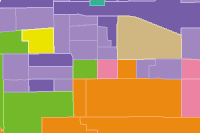

In [7]:
# Get Population Density
popdensity = popsearch_result[1]
popdensity

In [8]:
# Check all layers in population Density
popdensity.layers

[<FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/2de5ed56740947759e0f53d6330e0a84/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/0">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/2de5ed56740947759e0f53d6330e0a84/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/1">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/2de5ed56740947759e0f53d6330e0a84/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/2">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/2de5ed56740947759e0f53d6330e0a84/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/3">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/2de5ed56740947759e0f53d6330e0a84/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/4">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/2de5ed56740947759e0f53d6330e0a84/rest/services/USA_Demographi

In [9]:
# Identify FIeld Names
county_layer = popdensity.layers[46]
for field in county_layer.properties.fields[:10]:
#     print(field)
    print(field['name'], '\t\t', field['alias'])
#     print(field[0])

OBJECTID 		 OBJECTID
Shape 		 Shape
ID 		 ID
NAME 		 NAME
STATE_NAME 		 STATE_NAME
ST_ABBREV 		 ST_ABBREV
AREA 		 Area in Square Miles (Calculated)
TOTPOP_CY 		 2018 Total Population (Esri)
HHPOP_CY 		 2018 Household Population (Esri)
FAMPOP_CY 		 2018 Family Population (Esri)


In [11]:
# # Get specific attributes for Counties

# # county_layer = FeatureLayer("https://datascienceqa.esri.com/portal/sharing/servers/3e5f8ebe5a114a61b7f350e7a1203761/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/46")
# county_layer = popdensity.layers[46]
# county_df = pd.DataFrame()
# offset = 0
# while offset <= 50:
#     chunk_df = county_layer.query(out_fields=['Shape','ST_ABBREV','NAME','ASIAN_CY','AMERIND_CY','AVGHHSZ_CY','AVGHINC_CY','BLACK_CY','EDUCBASECY','HISPPOP_CY',
#                           'MEDAGE_CY','MINORITYCY','OTHRACE_CY','PCI_CY','POPDENS_CY','UNEMPRT_CY','WHITE_CY','SMCOLL_CY',
#                           'ASSCDEG_CY','BACHDEG_CY','GRADDEG_CY'],result_offset=offset,result_record_count=25,as_df=True)
# #     county_df_test = county_featureset_test.sdf
# #     if county_df.shape[0] == 0:
# #         county_df = chunk_df
# #     else:
#     county_df = pd.concat([chunk_df, county_df], ignore_index=True)
    
#     offset += 25

In [22]:
# Get specific attributes for Counties
%time
# county_layer = FeatureLayer("https://datascienceqa.esri.com/portal/sharing/servers/3e5f8ebe5a114a61b7f350e7a1203761/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/46")
county_layer = popdensity.layers[46]
county_df = pd.DataFrame()
offset = 0
while offset <= 3000:
    chunk_df = county_layer.query(out_fields=['Shape','ST_ABBREV','NAME','ASIAN_CY','AMERIND_CY','AVGHHSZ_CY','AVGHINC_CY','BLACK_CY','EDUCBASECY','HISPPOP_CY',
                          'MEDAGE_CY','MINORITYCY','OTHRACE_CY','PCI_CY','POPDENS_CY','UNEMPRT_CY','WHITE_CY','SMCOLL_CY',
                          'ASSCDEG_CY','BACHDEG_CY','GRADDEG_CY'],return_all_records=False,result_offset=offset,result_record_count=750,as_df=True)
#     county_df_test = county_featureset_test.sdf
#     if county_df.shape[0] == 0:
#         county_df = chunk_df
#     else:
    county_df = pd.concat([chunk_df, county_df], ignore_index=True)
    
    offset += 750

Wall time: 0 ns


In [29]:
# Plot County Data
county_df.spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))

In [28]:
county_df.spatial.to_featureclass(r'C:/Users/mohi9282/Desktop/arcgis/county_demography/county_downloader.gdb/test')

'C:/Users/mohi9282/Desktop/arcgis/county_demography/county_downloader.gdb\\test.shp'

In [26]:
county_df.shape

(3142, 22)

In [51]:
# Create csv of data
county_df.to_csv('county_df.csv', index=None, header=True)

In [233]:
# Load county data from csv file
# county_df = pd.read_csv('county_df.csv')

In [170]:
# Keeping specific columns
provider_county_df = county_df[['SHAPE','ST_ABBREV','NAME','ASIAN_CY','AMERIND_CY','AVGHHSZ_CY','AVGHINC_CY','BLACK_CY','EDUCBASECY','HISPPOP_CY',
                          'MEDAGE_CY','MINORITYCY','OTHRACE_CY','PCI_CY','POPDENS_CY','UNEMPRT_CY','WHITE_CY','SMCOLL_CY',
                          'ASSCDEG_CY','BACHDEG_CY','GRADDEG_CY']]
provider_county_df.head()

SHAPE ST_ABBREV  \
0  {"rings": [[[-8966174.9526, 4783327.065399997]...        WV   
1  {"rings": [[[-9010699.0351, 4553935.190499999]...        WV   
2  {"rings": [[[-8986636.5882, 4735386.193099998]...        WV   
3  {"rings": [[[-8792002.2509, 4755765.979599997]...        WV   
4  {"rings": [[[-8945639.7857, 4611379.798600003]...        WV   

                NAME  ASIAN_CY  AMERIND_CY  AVGHHSZ_CY  AVGHINC_CY  BLACK_CY  \
0   Doddridge County        33          26        2.42       51537       201   
1     Fayette County       101         112        2.37       50170      2000   
2      Gilmer County        51          53        2.35       50297      1044   
3       Grant County        26          19        2.40       52611       118   
4  Greenbrier County       196         137        2.27       55885      1078   

   EDUCBASECY  HISPPOP_CY  MEDAGE_CY  MINORITYCY  OTHRACE_CY  PCI_CY  \
0        6405          91       43.2         467           5   20870   
1       33677         540       44.7        3456         106   20953   
2        6106         479       39.0        1720         209   20296   
3        9296         171       46.9         453          82   21869   
4       27410         590       46.8        2669         184   24505   

   POPDENS_CY  UNEMPRT_CY  WHITE_CY  SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  \
0        27.7         5.8      8454       1048         363         695   
1        69.2         4.7     42649       5473        2901        3215   
2        24.5         7.6      6772       1272         336         632   
3        26.2         3.8     12092       1270         731         804   
4        36.0         1.0     34375       4667        1810        3689   

   GRADDEG_CY  
0         368  
1        1731  
2         460  
3         655  
4        2274

#### Remove Unnecessary columns

In [23]:
# Removing columns for 2023,2010,2000
county_df = county_df.loc[:,~county_df.columns.str.contains('FY|10|00')]
len(county_df.columns)

894

In [24]:
# Removing columns for individual age
county_df = county_df.loc[:,~county_df.columns.str.startswith(('AGE','MAGE','FAGE'))]
len(county_df.columns)

640

In [25]:
# Removing columns for Industry, Occupation
county_df = county_df.loc[:,~county_df.columns.str.startswith(('IND','OCC'))]
len(county_df.columns)

596

In [26]:
# Removing Individual Income Columns
county_df = county_df.loc[:,~county_df.columns.str.contains('A15|A25|A35|A45|A55|A65|A75')]
len(county_df.columns)

366

In [27]:
# Removing columns for Disposable Income and Net Worth
county_df = county_df.loc[:,~county_df.columns.str.startswith(('DI','NW'))]
len(county_df.columns)

348

In [28]:
# Removing columns for Tapestry Segmentation
county_df = county_df.loc[:,~county_df.columns.str.startswith(('TSE','THH','TADULT'))]
len(county_df.columns)

190

In [29]:
# Removing columns for Home Value
county_df = county_df.loc[:,~county_df.columns.str.startswith(('VAL'))]
len(county_df.columns)

181

In [30]:
county_df.columns

Index(['AAGEBASECY', 'AGGDI_CY', 'AGGHINC_CY', 'AGGINC_CY', 'AGGNW_CY',
       'AIFBASE_CY', 'AIMBASE_CY', 'AMERIND_CY', 'AREA', 'ASIAN_CY',
       ...
       'TOTHU_CY', 'TOTPOP_CY', 'UNEMPRT_CY', 'UNEMP_CY', 'VACANT_CY',
       'WAGEBASECY', 'WHITE_CY', 'WHTFBASECY', 'WHTMBASECY', 'WIDOWED_CY'],
      dtype='object', length=181)

In [31]:
print(obgyn_county_df.shape)
print(county_df.shape)

(1282, 3)
(3142, 181)


#### Create County df from Expenditure Data

In [14]:
# Search for Population data layer
expsearch_result = gis.content.search('title: 2018 USA Health Insurance Spending')
expsearch_result

[<Item title:"2018 USA Health Insurance Spending" type:Map Image Layer owner:esri_livingatlas>,
 <Item title:"2018 USA High Credit Card Expenditures" type:Map Image Layer owner:esri_livingatlas>]

<Item title:"2018 USA Health Insurance Spending" type:Map Image Layer owner:esri_livingatlas>
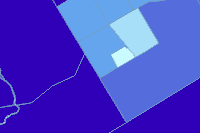

In [16]:
# Get Healthcare expenditure data
health_exp = expsearch_result[0]
health_exp

In [17]:
# Check all layers in population Density
health_exp.layers

[<FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/0">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/1">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/2">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/3">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/4">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/5">

In [18]:
# Look at the fields and their data types
health_exp_county_layer = health_exp.layers[46]
for f in health_exp_county_layer.properties.fields[:5]:
    print(f['name'],'      ',f['alias'])

OBJECTID        OBJECTID
Shape        Shape
ID        ID
NAME        NAME
STATE_NAME        STATE_NAME


In [19]:
# county_layer = FeatureLayer("https://datascienceqa.esri.com/portal/sharing/servers/3e5f8ebe5a114a61b7f350e7a1203761/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/46")
health_exp_county_layer = health_exp.layers[46]

health_exp_county_df = pd.DataFrame()
offset = 0
while offset <= 3000:
    chunk_df = health_exp_county_layer.query(out_fields=['ST_ABBREV','NAME','X8001_A','X8002_A','X8013_A','X8018_A','X8019_A','X8024_A','X8032_A','X13002_A','X13004_A'], return_all_records=False,result_offset=offset,result_record_count=500,as_df=True)
    health_exp_county_df = pd.concat([chunk_df, health_exp_county_df], ignore_index=True)
    offset += 500

In [30]:
health_exp_county_df.shape

(3142, 13)

In [31]:
health_exp_county_df.spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))

In [32]:
health_exp_county_df.spatial.to_featureclass(r'C:/Users/mohi9282/Desktop/arcgis/county_demography/healthexp.gdb/healthexptest')

'C:/Users/mohi9282/Desktop/arcgis/county_demography/healthexp.gdb\\healthexptest.shp'

In [82]:
health_exp_county_df.to_csv('health_exp_county_df.csv', index=None, header=True)

In [56]:
health_exp_county_df.head()

NAME  OBJECTID  \
0   Doddridge County      3001   
1     Fayette County      3002   
2      Gilmer County      3003   
3       Grant County      3004   
4  Greenbrier County      3005   

                                               SHAPE ST_ABBREV  X13002_A  \
0  {"rings": [[[-8966174.9526, 4783327.065399997,...        WV    270.40   
1  {"rings": [[[-9010699.0351, 4553935.190499999,...        WV    257.88   
2  {"rings": [[[-8986636.5882, 4735386.193099998,...        WV    248.70   
3  {"rings": [[[-8792002.2509, 4755765.979599997,...        WV    272.29   
4  {"rings": [[[-8945639.7857, 4611379.798600003,...        WV    280.79   

   X13004_A  X8001_A  X8002_A  X8013_A  X8018_A  X8019_A  X8024_A  X8032_A  
0   4548.75  4466.09  2894.59   632.30  1571.51   794.24    52.65   132.74  
1   4436.31  4258.47  2763.71   592.84  1494.76   759.18    49.59   124.51  
2   4427.67  4182.28  2716.19   579.07  1466.09   745.24    47.76   122.37  
3   4723.08  4382.40  2848.84   596.32  1533.57   784.03    50.31   125.52  
4   4990.78  4548.73  2959.83   618.61  1588.90   816.44    50.80   130.12

In [57]:
county_df.head()

AMERIND_CY  ASIAN_CY  ASSCDEG_CY  AVGHHSZ_CY  AVGHINC_CY  BACHDEG_CY  \
0          26        33         363        2.42       51537         695   
1         112       101        2901        2.37       50170        3215   
2          53        51         336        2.35       50297         632   
3          19        26         731        2.40       52611         804   
4         137       196        1810        2.27       55885        3689   

   BLACK_CY  EDUCBASECY  GRADDEG_CY  HISPPOP_CY  MEDAGE_CY  MINORITYCY  \
0       201        6405         368          91       43.2         467   
1      2000       33677        1731         540       44.7        3456   
2      1044        6106         460         479       39.0        1720   
3       118        9296         655         171       46.9         453   
4      1078       27410        2274         590       46.8        2669   

                NAME  OBJECTID  OTHRACE_CY  PCI_CY  POPDENS_CY  \
0   Doddridge County      3001           5   20870        27.7   
1     Fayette County      3002         106   20953        69.2   
2      Gilmer County      3003         209   20296        24.5   
3       Grant County      3004          82   21869        26.2   
4  Greenbrier County      3005         184   24505        36.0   

                                               SHAPE  SMCOLL_CY ST_ABBREV  \
0  {"rings": [[[-8966174.9526, 4783327.065399997,...       1048        WV   
1  {"rings": [[[-9010699.0351, 4553935.190499999,...       5473        WV   
2  {"rings": [[[-8986636.5882, 4735386.193099998,...       1272        WV   
3  {"rings": [[[-8792002.2509, 4755765.979599997,...       1270        WV   
4  {"rings": [[[-8945639.7857, 4611379.798600003,...       4667        WV   

   UNEMPRT_CY  WHITE_CY  
0         5.8      8454  
1         4.7     42649  
2         7.6      6772  
3         3.8     12092  
4         1.0     34375

In [171]:
# # Load expenditure data through csv
# health_exp_county_df = pd.read_csv('health_exp_county_df.csv')
# health_exp_county_df.head()

AREA     ID               NAME  OBJECTID  \
0   320.474928  54017   Doddridge County      3001   
1   668.342010  54019     Fayette County      3002   
2   340.082088  54021      Gilmer County      3003   
3   480.291190  54023       Grant County      3004   
4  1024.512782  54025  Greenbrier County      3005   

                                               SHAPE     STATE_NAME ST_ABBREV  \
0  {'rings': [[[-8966174.9526, 4783327.065399997]...  West Virginia        WV   
1  {'rings': [[[-9010699.0351, 4553935.190499999]...  West Virginia        WV   
2  {'rings': [[[-8986636.5882, 4735386.193099998]...  West Virginia        WV   
3  {'rings': [[[-8792002.2509, 4755765.979599997]...  West Virginia        WV   
4  {'rings': [[[-8945639.7857, 4611379.798600003]...  West Virginia        WV   

     Shape_Area   Shape_Length  TOTHH_CY  TOTPOP_CY  X10001_A  X10001_I  \
0  1.386118e+09  181962.662239      3246       8841    498.26        60   
1  2.782337e+09  338942.950065     18532      45748    485.10        59   
2  1.453919e+09  190697.949972      2731       8294    489.00        59   
3  2.067679e+09  253575.180085      5152      12489    513.24        62   
4  4.276573e+09  356243.711600     15919      36716    544.65        66   

   X10001_X  X10002_A  X10002_I  X10002_X  X10003_A  X10003_I  X10003_X  \
0   1617359    308.91        64   1002706     65.81        67    213609   
1   8989910    300.76        62   5573710     63.71        65   1180584   
2   1335459    303.26        62    828205     64.10        65    175070   
3   2644220    312.98        64   1612495     66.06        67    340327   
4   8670291    331.42        68   5275822     69.36        70   1104221   

   X10004_A  X10004_I  X10004_X  X10005_A  X10005_I  X10005_X  X10006_A  \
0     11.66        70     37856      2.06        50      6674     32.56   
1     11.30        68    209460      2.16        53     39950     31.71   
2     11.29        68     30836      2.44        60      6662     31.92   
3     11.60        70     59761      2.25        55     11571     33.14   
4     12.01        72    191122      2.53        62     40225     35.23   

   X10006_I  X10006_X  X10007_A  X10007_I  X10007_X  X10008_A  X10008_I  \
0        64    105677     20.01        74     64938    127.56        59   
1        62    587613     19.14        71    354648    124.42        58   
2        62     87167     19.00        70     51881    126.11        59   
3        65    170759     19.73        73    101626    130.84        61   
4        69    560774     20.39        75    324644    139.44        65   

   X10008_X  X10009_A  X10009_I  X10009_X  X10010_A  X10010_I  X10010_X  \
0    414064     36.52        68    118537      6.68        79     21689   
1   2305766     35.73        66    662170      6.57        78    121816   
2    344406     35.66        66     97393      6.49        77     17731   
3    674069     36.75        68    189336      6.36        75     32784   
4   2219770     38.92        72    619527      6.71        79    106783   

   X10011_A  X10011_I  X10011_X  X10012_A  X10012_I  X10012_X  X10013_A  \
0      6.06        56     19662    189.36        55    614653     98.36   
1      6.03        56    111703    184.34        54   3416200     95.70   
2      6.25        58     17059    185.74        54    507254     96.32   
3      6.26        58     32262    200.26        59   1031725    103.83   
4      6.83        63    108756    213.23        62   3394469    110.67   

   X10013_I  X10013_X  X10014_A  X10014_I  X10014_X   X1001_A  X1001_I  \
0        56    319281     91.00        55    295372  45764.55       64   
1        54   1773494     88.64        54   1642706  44512.69       62   
2        54    263047     89.42        54    244207  44670.74       63   
3        59    534947     96.42        58    496778  46303.51       65   
4        63   1761775    102.56        62   1632694  49092.22       69   

     X1001_X  X1002_A  X1002_I    X1002_X  X100

#### Merge dataframes

In [45]:
# Merge provider count and demographic data at county level
mental_demo_df = pd.merge(mental_county_df,county_df,left_on=['regionabbr','subregion'], right_on=['ST_ABBREV','NAME'],how='left')

# Merge provider count and women_df at state level
newcounty_mental_df = pd.merge(mental_demo_df,health_exp_county_df,left_on=['regionabbr','subregion'], right_on=['ST_ABBREV','NAME'],how='left')

In [46]:
newcounty_mental_df.shape

(1695, 38)

In [47]:
type(newcounty_mental_df)

pandas.core.frame.DataFrame

In [52]:
# Drop duplicate columns
newcounty_mental_df.drop(['ST_ABBREV_x','NAME_x','OBJECTID_y','ST_ABBREV_y','NAME_y','SHAPE_y'], axis=1, inplace=True)

In [55]:
newcounty_mental_df.head()

regionabbr           subregion  Provider_Count  AMERIND_CY   ASIAN_CY  \
0         CA  Los Angeles County         11400.0     73559.0  1517296.0   
1         MI      Oakland County          8112.0      3461.0    95431.0   
2         NY     New York County          7576.0      8756.0   212844.0   
3         FL   Miami-Dade County          7357.0      5960.0    42319.0   
4         IL         Cook County          6834.0     21113.0   395712.0   

   ASSCDEG_CY  AVGHHSZ_CY  AVGHINC_CY  BACHDEG_CY   BLACK_CY  EDUCBASECY  \
0    469649.0        3.00     94861.0   1445895.0   850350.0   6899087.0   
1     69135.0        2.45    104439.0    236121.0   176817.0    891271.0   
2     48360.0        2.00    136860.0    406878.0   247085.0   1251653.0   
3    177135.0        2.85     74076.0    347168.0   477399.0   1927223.0   
4    237028.0        2.58     88254.0    830433.0  1233716.0   3607345.0   

   GRADDEG_CY  HISPPOP_CY  MEDAGE_CY  MINORITYCY  OBJECTID_x  OTHRACE_CY  \
0    782758.0   5043293.0       35.7   7644196.0       205.0   2305030.0   
1    178686.0     51743.0       41.9    354337.0      1294.0     13960.0   
2    371255.0    441304.0       37.9    899778.0      1859.0    193191.0   
3    201433.0   1880878.0       39.1   2374769.0       363.0     92152.0   
4    552050.0   1374256.0       36.6   3078944.0       611.0    608672.0   

    PCI_CY  POPDENS_CY                                            SHAPE_x  \
0  31563.0      2535.5  {'rings': [[[-13201886.423700001, 3900000.9334...   
1  42427.0      1445.3  {'rings': [[[-9248800.6682, 5228197.476099998,...   
2  66805.0     72736.2  {'rings': [[[-8242549.350199999, 4966646.20400...   
3  25972.0      1438.5  {'rings': [[[-8992038.9015, 2865572.9342, 0, 0...   
4  34083.0      5579.2  {'rings': [[[-9743209.5443, 5109696.7809000015...   

   SMCOLL_CY  UNEMPRT_CY   WHITE_CY  X13002_A  X13004_A  X8001_A  X8002_A  \
0  1300786.0         4.5  5019340.0    399.93   9046.16  5905.52  3907.44   
1   185739.0         3.6   931347.0    498.01  10106.34  7092.81  4677.71   
2   121070.0         3.9   924396.0    530.01  12793.70  8035.56  5382.10   
3   299091.0         6.0  2043088.0    313.81   6977.40  4889.80  3236.30   
4   690225.0         6.9  2859209.0    381.05   8356.49  5692.87  3774.06   

   X8013_A  X8018_A  X8019_A  X8024_A  X8032_A  
0   579.43  1998.08  1132.94    59.76   118.60  
1   737.81  2415.10  1327.66    73.89   154.37  
2   796.17  2653.46  1464.96    69.80   167.61  
3   514.74  1653.50   907.46    49.41   109.80  
4   585.60  1918.81  1061.74    56.05   122.50

In [54]:
newcounty_mental_df.spatial.plot()

KeyError: None

In [ ]:
# county_df.spatial.to_featureclass(r'C:/Users/mohi9282/Desktop/arcgis/county_demography/county_downloader.gdb/test2')

In [191]:
test = newcounty_mental_df.sdf
test.head()

AttributeError: 'DataFrame' object has no attribute 'sdf'

In [190]:
newcounty_mental_df.to_featureclass(out_name="county_mental.shp")

AttributeError: 'DataFrame' object has no attribute 'to_featureclass'

In [245]:
newcounty_mental_df.to_csv('newcounty_mental_df.csv',index=None,header=True)

In [7]:
# Read from csv
# newcounty_obgyn_df = pd.read_csv('newcounty_obgyn_df.csv')
# newcounty_obgyn_df.head()

regionabbr           subregion  Provider_Count   ASIAN_CY  AMERIND_CY  \
0         CA  Los Angeles County            2094  1517296.0     73559.0   
1         IL         Cook County            1586   395712.0     21113.0   
2         NY     New York County            1136   212844.0      8756.0   
3         TX       Harris County            1124   341640.0     30001.0   
4         AZ     Maricopa County             844   184150.0     98584.0   

   AVGHHSZ_CY  AVGHINC_CY   BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  \
0        3.00     94861.0   850350.0   6899087.0   5043293.0       35.7   
1        2.58     88254.0  1233716.0   3607345.0   1374256.0       36.6   
2        2.00    136860.0   247085.0   1251653.0    441304.0       37.9   
3        2.85     89252.0   901459.0   3029538.0   2035551.0       33.5   
4        2.69     83005.0   253576.0   2891837.0   1373153.0       35.8   

   MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  UNEMPRT_CY   WHITE_CY  \
0   7644196.0   2305030.0  31563.0      2535.5         4.5  5019340.0   
1   3078944.0    608672.0  34083.0      5579.2         6.9  2859209.0   
2    899778.0    193191.0  66805.0     72736.2         3.9   924396.0   
3   3339578.0    712410.0  31405.0      2780.1         5.9  2573473.0   
4   1981147.0    598035.0  30701.0       476.9         5.3  3066684.0   

   SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  X8001_A  X8002_A  X8013_A  \
0  1300786.0    469649.0   1445895.0    782758.0  5905.52  3907.44   579.43   
1   690225.0    237028.0    830433.0    552050.0  5692.87  3774.06   585.60   
2   121070.0     48360.0    406878.0    371255.0  8035.56  5382.10   796.17   
3   606842.0    193511.0    605813.0    345886.0  5800.32  3840.81   564.48   
4   711033.0    241714.0    597653.0    342159.0  5574.19  3675.76   581.95   

   X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  X13004_A  
0  1998.08  1132.94    59.76   118.60    399.93   9046.16  
1  1918.81  1061.74    56.05   122.50    381.05   8356.49  
2  2653.46  1464.96    69.80   167.61    530.01  12793.70  
3  1959.50  1087.37    60.64   119.69    374.86   8547.08  
4  1898.43  1041.69    57.84   123.67    362.02   7908.62

In [13]:
newcounty_mental_df = pd.read_csv('newcounty_mental_df.csv', header=True)

TypeError: Passing a bool to header is invalid. Use header=None for no header or header=int or list-like of ints to specify the row(s) making up the column names

In [10]:
test_newcounty_df = newcounty_mental_df.copy()
test_newcounty_df.head()

regionabbr           subregion  Provider_Count   ASIAN_CY  AMERIND_CY  \
0         CA  Los Angeles County           11400  1517296.0     73559.0   
1         MI      Oakland County            8112    95431.0      3461.0   
2         NY     New York County            7576   212844.0      8756.0   
3         FL   Miami-Dade County            7357    42319.0      5960.0   
4         IL         Cook County            6834   395712.0     21113.0   

   AVGHHSZ_CY  AVGHINC_CY   BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  \
0        3.00     94861.0   850350.0   6899087.0   5043293.0       35.7   
1        2.45    104439.0   176817.0    891271.0     51743.0       41.9   
2        2.00    136860.0   247085.0   1251653.0    441304.0       37.9   
3        2.85     74076.0   477399.0   1927223.0   1880878.0       39.1   
4        2.58     88254.0  1233716.0   3607345.0   1374256.0       36.6   

   MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  UNEMPRT_CY   WHITE_CY  \
0   7644196.0   2305030.0  31563.0      2535.5         4.5  5019340.0   
1    354337.0     13960.0  42427.0      1445.3         3.6   931347.0   
2    899778.0    193191.0  66805.0     72736.2         3.9   924396.0   
3   2374769.0     92152.0  25972.0      1438.5         6.0  2043088.0   
4   3078944.0    608672.0  34083.0      5579.2         6.9  2859209.0   

   SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  X8001_A  X8002_A  X8013_A  \
0  1300786.0    469649.0   1445895.0    782758.0  5905.52  3907.44   579.43   
1   185739.0     69135.0    236121.0    178686.0  7092.81  4677.71   737.81   
2   121070.0     48360.0    406878.0    371255.0  8035.56  5382.10   796.17   
3   299091.0    177135.0    347168.0    201433.0  4889.80  3236.30   514.74   
4   690225.0    237028.0    830433.0    552050.0  5692.87  3774.06   585.60   

   X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  X13004_A  
0  1998.08  1132.94    59.76   118.60    399.93   9046.16  
1  2415.10  1327.66    73.89   154.37    498.01  10106.34  
2  2653.46  1464.96    69.80   167.61    530.01  12793.70  
3  1653.50   907.46    49.41   109.80    313.81   6977.40  
4  1918.81  1061.74    56.05   122.50    381.05   8356.49

In [35]:
# test_newcounty_df.drop(['OBJECTID','SHAPE','STATE_NAME','ST_ABBREV','NAME','Shape_Area','Shape_Length','TLIFENAME','ID','TLIFECODE'], axis=1, inplace=True)
# test_newcounty_df.head()

RegionAbbr           Subregion  Provider_Count  AAGEBASECY      AGGDI_CY  \
0         CA  Los Angeles County            2094   1517296.0  2.359152e+11   
1         IL         Cook County            1586    395712.0  1.284204e+11   
2         NY     New York County            1136    212844.0  6.672674e+10   
3         TX       Harris County            1124    341640.0  1.132993e+11   
4         AZ     Maricopa County             844    184150.0  1.043304e+11   

     AGGHINC_CY     AGGINC_CY      AGGNW_CY  AIFBASE_CY  AIMBASE_CY  \
0  3.196410e+11  3.247511e+11  2.224411e+12     35957.0     37602.0   
1  1.771502e+11  1.797564e+11  1.326345e+12     10418.0     10695.0   
2  1.091191e+11  1.109282e+11  4.008776e+11      4542.0      4214.0   
3  1.470200e+11  1.487312e+11  1.000460e+12     14364.0     15637.0   
4  1.333034e+11  1.346919e+11  1.310493e+12     51929.0     46655.0   

   AMERIND_CY         AREA   ASIAN_CY  ASNFBASECY  ASNMBASECY  ASSCDEG_CY  \
0     73559.0  4085.699440  1517296.0    805865.0    711431.0    469649.0   
1     21113.0   953.145682   395712.0    206041.0    189671.0    237028.0   
2      8756.0    22.950686   212844.0    119067.0     93777.0     48360.0   
3     30001.0  1748.811066   341640.0    173439.0    168201.0    193511.0   
4     98584.0  9224.040205   184150.0     97892.0     86258.0    241714.0   

   AVGDI_CY  AVGFMSZ_CY  AVGHHSZ_CY  AVGHINC_CY  AVGNW_CY  AVGVAL_CY  \
0   70013.0        3.63        3.00     94861.0  660145.0   710686.0   
1   63978.0        3.36        2.58     88254.0  660769.0   335311.0   
2   83690.0        3.02        2.00    136860.0  502791.0  1307852.0   
3   68781.0        3.49        2.85     89252.0  607353.0   251600.0   
4   64964.0        3.32        2.69     83005.0  816017.0   303705.0   

   BABYBOOMCY  BACHDEG_CY  BAGEBASECY   BLACK_CY  BLKFBASECY  BLKMBASECY  \
0   1987624.0   1445895.0    850350.0   850350.0    450243.0    400107.0   
1   1076607.0    830433.0   1233716.0  1233716.0    674544.0    559172.0   
2    345825.0    406878.0    247085.0   247085.0    133471.0    113614.0   
3    848003.0    605813.0    901459.0   901459.0    478023.0    423436.0   
4    872897.0    597653.0    253576.0   253576.0    124641.0    128935.0   

   CIVLBFR_CY  EDUCBASECY     EMP_CY   FAMHH_CY  FAMPOP_CY   FEM0_CY  \
0   5232399.0   6899087.0  4995839.0  2281483.0  8292844.0  312953.0   
1   2791109.0   3607345.0  2599303.0  1216270.0  4087547.0  158205.0   
2    996167.0   1251653.0   956908.0   314952.0   951099.0   35672.0   
3   2335018.0   3029538.0  2196764.0  1124808.0  3920902.0  176809.0   
4   2181523.0   2891837.0  2065771.0  1053223.0  3492063.0  149041.0   

   FEM15_CY  FEM18UP_CY  FEM20_CY  FEM21UP_CY  FEM25_CY  FEM30_CY  FEM35_CY  \
0  331081.0   4077284.0  384255.0   3858162.0  421330.0  392960.0  359612.0   
1  161652.0   2144742.0  185272.0   2040962.0  217698.0  207243.0  188312.0   
2   40691.0    760316.0   71461.0    725473.0   95217.0   86134.0   68890.0   
3  152219.0   1773341.0  169057.0   1680385.0  196592.0  183051.0  171499.0   
4  138470.0   1694648.0  151115.0   1606050.0  165009.0  153091.0  145864.0   

   FEM40_CY  FEM45_CY  FEM50_CY  FEM55_CY   FEM5_CY  FEM60_CY  FEM65_CY  \
0  328513.0  335961.0  332084.0  327978.0  310887.0  291733.0  246493.0   
1  166222.0  164629.0  166570.0  174115.0  159117.0  162326.0  139839.0   
2   53980.0   50374.0   50312.0   53400.0   32553.0   52503.0   49261.0   
3  154056.0  148493.0  141554.0  141858.0  172608.0  125458.0  102481.0   
4  134160.0  133211.0  130665.0  133428.0  147853.0  125740.0  117630.0   

   FEM70_CY  FEM75_CY  FEM80_CY  FEM85_CY  FEMALES_CY    GED_CY  GENALPHACY  \
0  183490.0  131256.0   90178.0  110499.0   5208957.0  120351.0    255399.0   
1  104629.0   75554.0   54048.0   70522.0   2717277.0   95959.0    129327.0   
2   38526.0   27262.0   18025.0   22645.0    878322.0   26610.0     30855.0   
3   70111.0   46215.0   29690.0   32228.0   2380573.0   98795.0    145111.0   

In [334]:
# Change Provider Count to Float
# test_newcounty_df['Provider_Count'] = test_newstate_df['Provider_Count'].astype(float)

#### Handle Missing Values

In [11]:
# Any missing values in the data
test_newcounty_df.isnull().sum().sum()

5915

In [12]:
# Columns with missing values
test_newcounty_df.isnull().sum()

regionabbr          1
subregion           1
Provider_Count      0
ASIAN_CY          219
AMERIND_CY        219
AVGHHSZ_CY        219
AVGHINC_CY        219
BLACK_CY          219
EDUCBASECY        219
HISPPOP_CY        219
MEDAGE_CY         219
MINORITYCY        219
OTHRACE_CY        219
PCI_CY            219
POPDENS_CY        219
UNEMPRT_CY        219
WHITE_CY          219
SMCOLL_CY         219
ASSCDEG_CY        219
BACHDEG_CY        219
GRADDEG_CY        219
X8001_A           219
X8002_A           219
X8013_A           219
X8018_A           219
X8019_A           219
X8024_A           219
X8032_A           219
X13002_A          219
X13004_A          219
dtype: int64

In [21]:
test_newcounty_df[test_newcounty_df['regionabbr'].isnull()]

regionabbr subregion  Provider_Count  ASIAN_CY  AMERIND_CY  AVGHHSZ_CY  \
1679        NaN   Ipiales               1       NaN         NaN         NaN   

      AVGHINC_CY  BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  MINORITYCY  \
1679         NaN       NaN         NaN         NaN        NaN         NaN   

      OTHRACE_CY  PCI_CY  POPDENS_CY  UNEMPRT_CY  WHITE_CY  SMCOLL_CY  \
1679         NaN     NaN         NaN         NaN       NaN        NaN   

      ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  X8001_A  X8002_A  X8013_A  X8018_A  \
1679         NaN         NaN         NaN      NaN      NaN      NaN      NaN   

      X8019_A  X8024_A  X8032_A  X13002_A  X13004_A  
1679      NaN      NaN      NaN       NaN       NaN

In [22]:
# Dataframe of rows and columns with null
null_data = test_newcounty_df[test_newcounty_df.isnull().any(axis=1)]
null_data.head()

regionabbr                         subregion  Provider_Count  ASIAN_CY  \
8          CA                        Sacramento            3532       NaN   
15         CA  City and County of San Francisco            2534       NaN   
21         HI       City and County of Honolulu            1952       NaN   
40         MD                 City of Baltimore            1345       NaN   
49         CO         City and County of Denver            1156       NaN   

    AMERIND_CY  AVGHHSZ_CY  AVGHINC_CY  BLACK_CY  EDUCBASECY  HISPPOP_CY  \
8          NaN         NaN         NaN       NaN         NaN         NaN   
15         NaN         NaN         NaN       NaN         NaN         NaN   
21         NaN         NaN         NaN       NaN         NaN         NaN   
40         NaN         NaN         NaN       NaN         NaN         NaN   
49         NaN         NaN         NaN       NaN         NaN         NaN   

    MEDAGE_CY  MINORITYCY  OTHRACE_CY  PCI_CY  POPDENS_CY  UNEMPRT_CY  \
8         NaN         NaN         NaN     NaN         NaN         NaN   
15        NaN         NaN         NaN     NaN         NaN         NaN   
21        NaN         NaN         NaN     NaN         NaN         NaN   
40        NaN         NaN         NaN     NaN         NaN         NaN   
49        NaN         NaN         NaN     NaN         NaN         NaN   

    WHITE_CY  SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  X8001_A  X8002_A  \
8        NaN        NaN         NaN         NaN         NaN      NaN      NaN   
15       NaN        NaN         NaN         NaN         NaN      NaN      NaN   
21       NaN        NaN         NaN         NaN         NaN      NaN      NaN   
40       NaN        NaN         NaN         NaN         NaN      NaN      NaN   
49       NaN        NaN         NaN         NaN         NaN      NaN      NaN   

    X8013_A  X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  X13004_A  
8       NaN      NaN      NaN      NaN      NaN       NaN       NaN  
15      NaN      NaN      NaN      NaN      NaN       NaN       NaN  
21      NaN      NaN      NaN      NaN      NaN       NaN       NaN  
40      NaN      NaN      NaN      NaN      NaN       NaN       NaN  
49      NaN      NaN      NaN      NaN      NaN       NaN       NaN

In [23]:
null_data.shape

(219, 30)

In [24]:
# Rows where all columns (except region, subregion, Provider Count) are null
test_newcounty_df.index[test_newcounty_df.iloc[:,3:].isnull().all(1)]

Int64Index([   8,   15,   21,   40,   49,   54,   91,  110,  121,  142,
            ...
            1651, 1666, 1673, 1674, 1677, 1679, 1682, 1683, 1689, 1696],
           dtype='int64', length=219)

In [25]:
test_newcounty_df.dropna(inplace=True)

In [26]:
test_newcounty_df.isnull().sum().sum()

0

In [254]:
test_newcounty_df.head()

regionabbr           subregion  Provider_Count   ASIAN_CY  AMERIND_CY  \
0         CA  Los Angeles County           11400  1517296.0     73559.0   
1         MI      Oakland County            8112    95431.0      3461.0   
2         NY     New York County            7576   212844.0      8756.0   
3         FL   Miami-Dade County            7357    42319.0      5960.0   
4         IL         Cook County            6834   395712.0     21113.0   

   AVGHHSZ_CY  AVGHINC_CY   BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  \
0        3.00     94861.0   850350.0   6899087.0   5043293.0       35.7   
1        2.45    104439.0   176817.0    891271.0     51743.0       41.9   
2        2.00    136860.0   247085.0   1251653.0    441304.0       37.9   
3        2.85     74076.0   477399.0   1927223.0   1880878.0       39.1   
4        2.58     88254.0  1233716.0   3607345.0   1374256.0       36.6   

   MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  UNEMPRT_CY   WHITE_CY  \
0   7644196.0   2305030.0  31563.0      2535.5         4.5  5019340.0   
1    354337.0     13960.0  42427.0      1445.3         3.6   931347.0   
2    899778.0    193191.0  66805.0     72736.2         3.9   924396.0   
3   2374769.0     92152.0  25972.0      1438.5         6.0  2043088.0   
4   3078944.0    608672.0  34083.0      5579.2         6.9  2859209.0   

   SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  X8001_A  X8002_A  X8013_A  \
0  1300786.0    469649.0   1445895.0    782758.0  5905.52  3907.44   579.43   
1   185739.0     69135.0    236121.0    178686.0  7092.81  4677.71   737.81   
2   121070.0     48360.0    406878.0    371255.0  8035.56  5382.10   796.17   
3   299091.0    177135.0    347168.0    201433.0  4889.80  3236.30   514.74   
4   690225.0    237028.0    830433.0    552050.0  5692.87  3774.06   585.60   

   X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  X13004_A  
0  1998.08  1132.94    59.76   118.60    399.93   9046.16  
1  2415.10  1327.66    73.89   154.37    498.01  10106.34  
2  2653.46  1464.96    69.80   167.61    530.01  12793.70  
3  1653.50   907.46    49.41   109.80    313.81   6977.40  
4  1918.81  1061.74    56.05   122.50    381.05   8356.49

In [121]:
test_newcounty_df.describe()

Provider_Count      ASIAN_CY    AMERIND_CY   AVGHHSZ_CY     AVGHINC_CY  \
count     1478.000000  1.478000e+03   1478.000000  1478.000000    1478.000000   
mean       160.037889  1.040479e+04   1742.918809     2.515934   69115.956698   
std        621.979749  5.962475e+04   5559.612414     0.229749   17761.105508   
min          1.000000  1.000000e+00      6.000000     1.960000   36078.000000   
25%          4.000000  1.210000e+02    128.250000     2.380000   57214.500000   
50%         17.000000  3.715000e+02    339.000000     2.480000   65234.000000   
75%         74.000000  2.275000e+03   1140.750000     2.610000   76302.500000   
max      11400.000000  1.517296e+06  98584.000000     4.340000  156866.000000   

           BLACK_CY    EDUCBASECY    HISPPOP_CY    MEDAGE_CY    MINORITYCY  \
count  1.478000e+03  1.478000e+03  1.478000e+03  1478.000000  1.478000e+03   
mean   2.150520e+04  1.128491e+05  3.388222e+04    40.904465  7.054918e+04   
std    7.618869e+04  3.100071e+05  1.850521e+05     5.308373  3.000319e+05   
min    0.000000e+00  6.700000e+02  3.100000e+01    24.500000  8.400000e+01   
25%    2.930000e+02  1.500350e+04  7.132500e+02    37.700000  2.995000e+03   
50%    2.056500e+03  3.105350e+04  2.659000e+03    40.850000  9.508500e+03   
75%    1.162200e+04  8.683975e+04  1.115525e+04    43.975000  3.189475e+04   
max    1.233716e+06  6.899087e+06  5.043293e+06    59.200000  7.644196e+06   

         OTHRACE_CY        PCI_CY    POPDENS_CY   UNEMPRT_CY      WHITE_CY  \
count  1.478000e+03   1478.000000   1478.000000  1478.000000  1.478000e+03   
mean   1.286970e+04  27207.014208    380.374425     4.848173  1.133215e+05   
std    7.695647e+04   6706.243645   2505.175156     2.400134  2.625435e+05   
min    0.000000e+00   9853.000000      0.100000     0.300000  3.740000e+02   
25%    2.192500e+02  22650.250000     29.000000     3.300000  1.652500e+04   
50%    9.105000e+02  26186.500000     68.600000     4.500000  3.710750e+04   
75%    4.279000e+03  30145.750000    195.475000     5.900000  9.986050e+04   
max    2.305030e+06  71106.000000  72736.200000    27.000000  5.019340e+06   

          SMCOLL_CY     ASSCDEG_CY    BACHDEG_CY     GRADDEG_CY       X8001_A  \
count  1.478000e+03    1478.000000  1.478000e+03    1478.000000   1478.000000   
mean   2.303105e+04    9458.037889  2.279494e+04   14285.767253   5126.830095   
std    6.071474e+04   23107.795477  6.891475e+04   43459.728449    992.728929   
min    1.590000e+02      38.000000  7.900000e+01      44.000000   2898.780000   
25%    3.054750e+03    1263.000000  1.683250e+03     866.250000   4468.030000   
50%    6.748500e+03    2842.000000  4.235500e+03    2248.000000   4944.800000   
75%    1.932650e+04    8049.750000  1.501800e+04    8483.750000   5573.230000   
max    1.300786e+06  469649.000000  1.445895e+06  782758.000000  10125.260000   

           X8002_A      X8013_A      X8018_A      X8019_A      X8024_A  \
count  1478.000000  1478.000000  1478.000000  1478.000000  1478.000000   
mean   3359.837585   610.006279  1766.992558   939.973579    56.047111   
std     662.385123    94.712269   331.345767   197.446442    10.806146   
min    1897.980000   371.760000  1000.810000   510.880000    25.870000   
25%    2913.365000   548.020000  1544.607500   805.902500    48.957500   
50%    3238.190000   596.760000  1708.985000   902.385000    54.160000   
75%    3652.092500   659.497500  1915.310000  1027.352500    61.360000   
max    6711.290000  1062.380000  3413.960000  1930.730000   108.130000   

           X8032_A     X13002_A      X13004_A  
count  1478.000000  1478.000000   1478.000000  
mean    127.965535   333.863200   6450.159222  
std      18.526359    81.498432   1851.469188  
min      78.710000   169.840000   3121.710000  
25%     115.932500   280.470000   5230.897500  
50%     125.510000   319.315000   6040.295000  
75%     137.827500   368.472500   7209.232500  
max     214.890000   791.450000  15808.810000

#### Plot the data

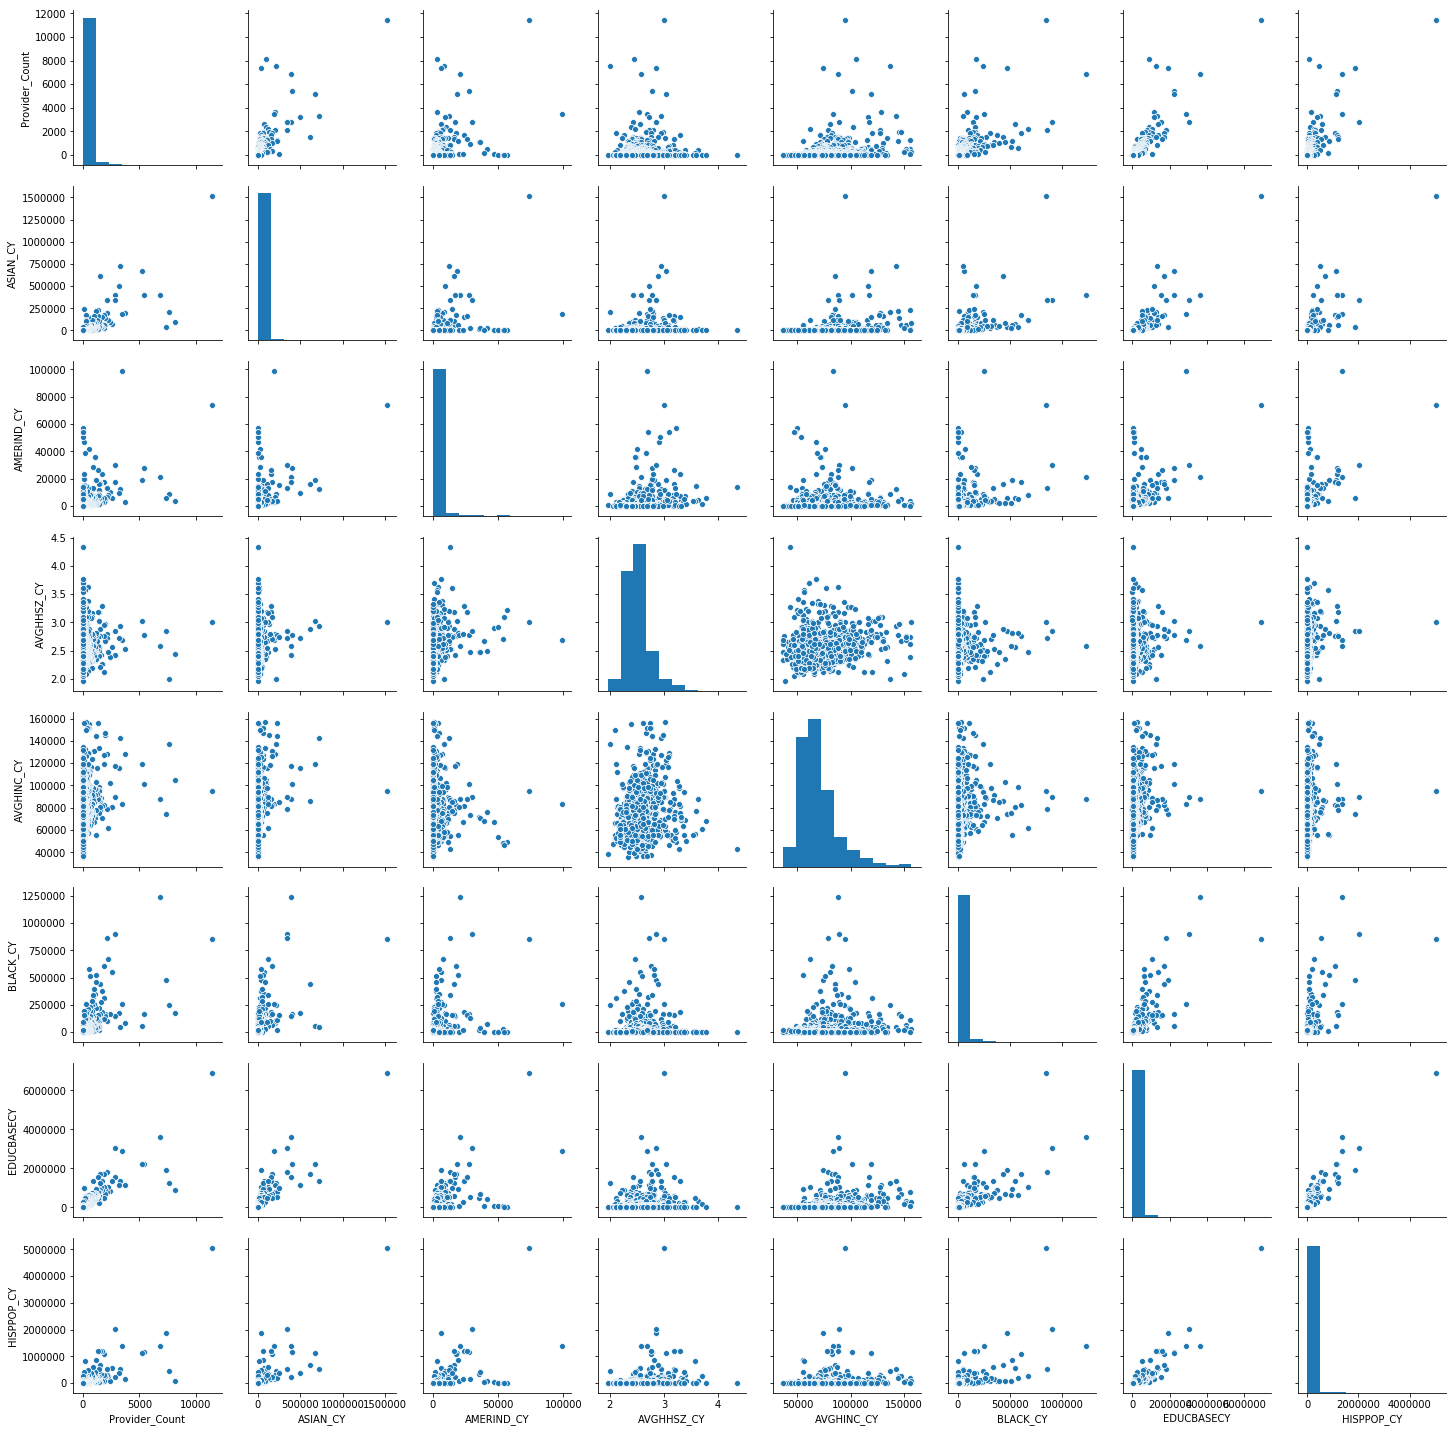

In [255]:
sns.pairplot(test_newcounty_df.iloc[:,2:10])

In [63]:
test_newcounty_df[test_newcounty_df['ASIAN_CY']>1250000]

regionabbr           subregion  Provider_Count   ASIAN_CY  AMERIND_CY  \
0         CA  Los Angeles County            2094  1517296.0     73559.0   

   AVGHHSZ_CY  AVGHINC_CY  BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  \
0         3.0     94861.0  850350.0   6899087.0   5043293.0       35.7   

   MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  UNEMPRT_CY   WHITE_CY  \
0   7644196.0   2305030.0  31563.0      2535.5         4.5  5019340.0   

   X8001_A  X8002_A  X8013_A  X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  \
0  5905.52  3907.44   579.43  1998.08  1132.94    59.76    118.6    399.93   

   X13004_A  
0   9046.16

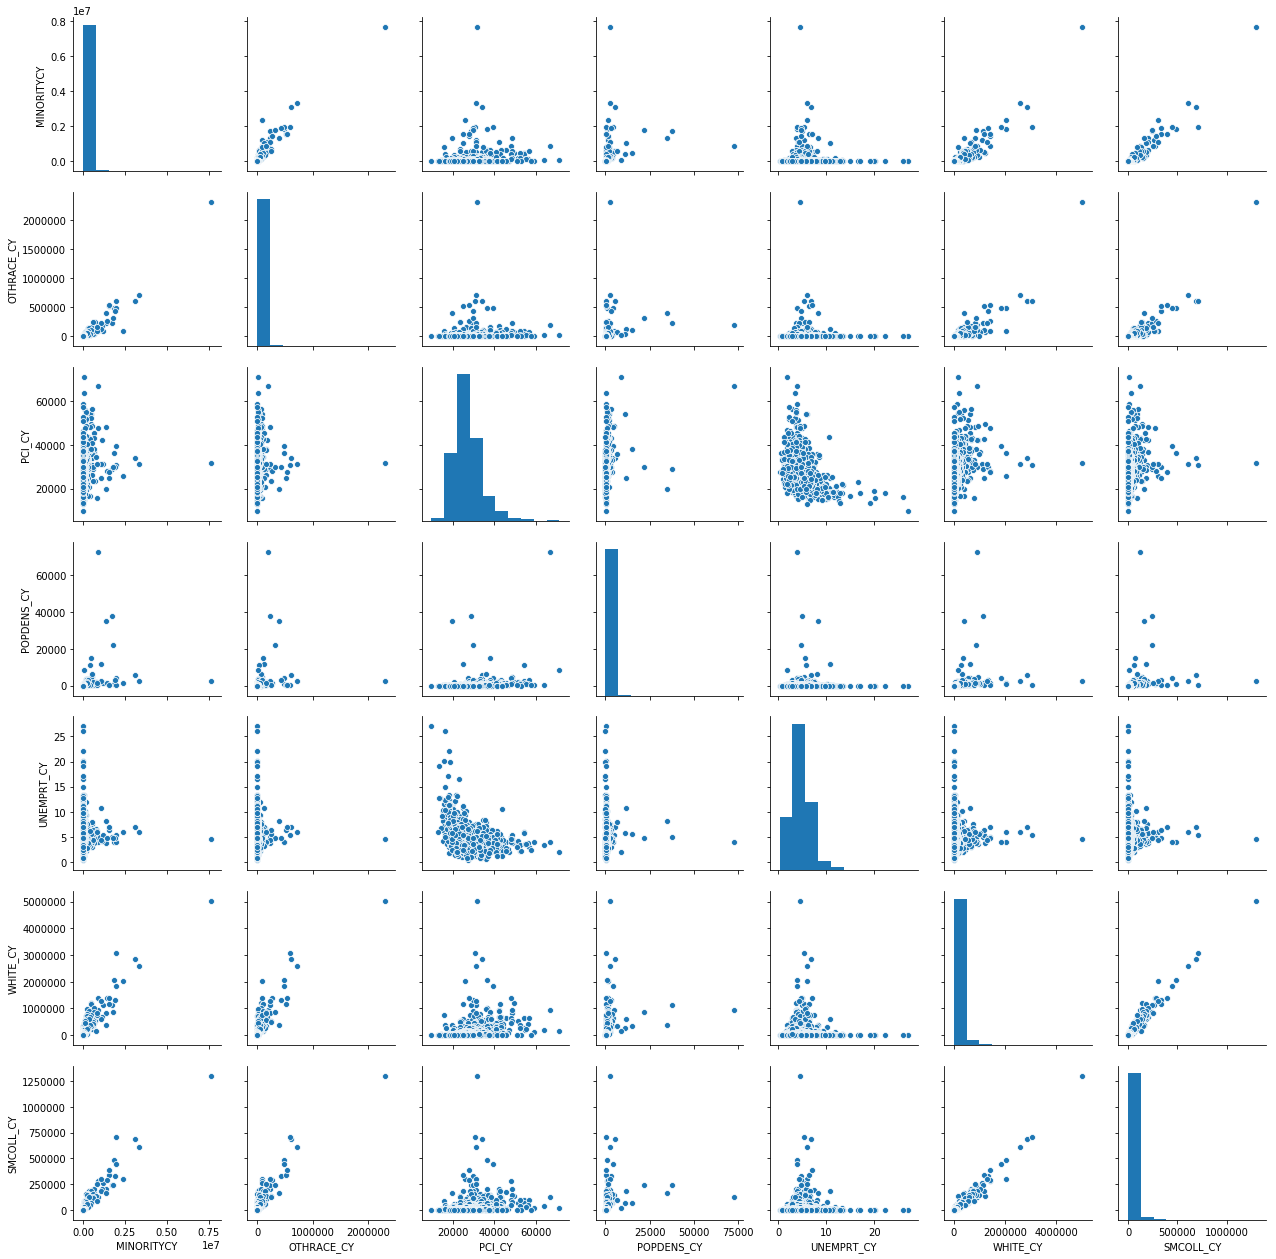

In [256]:
sns.pairplot(test_newcounty_df.iloc[:,11:18])

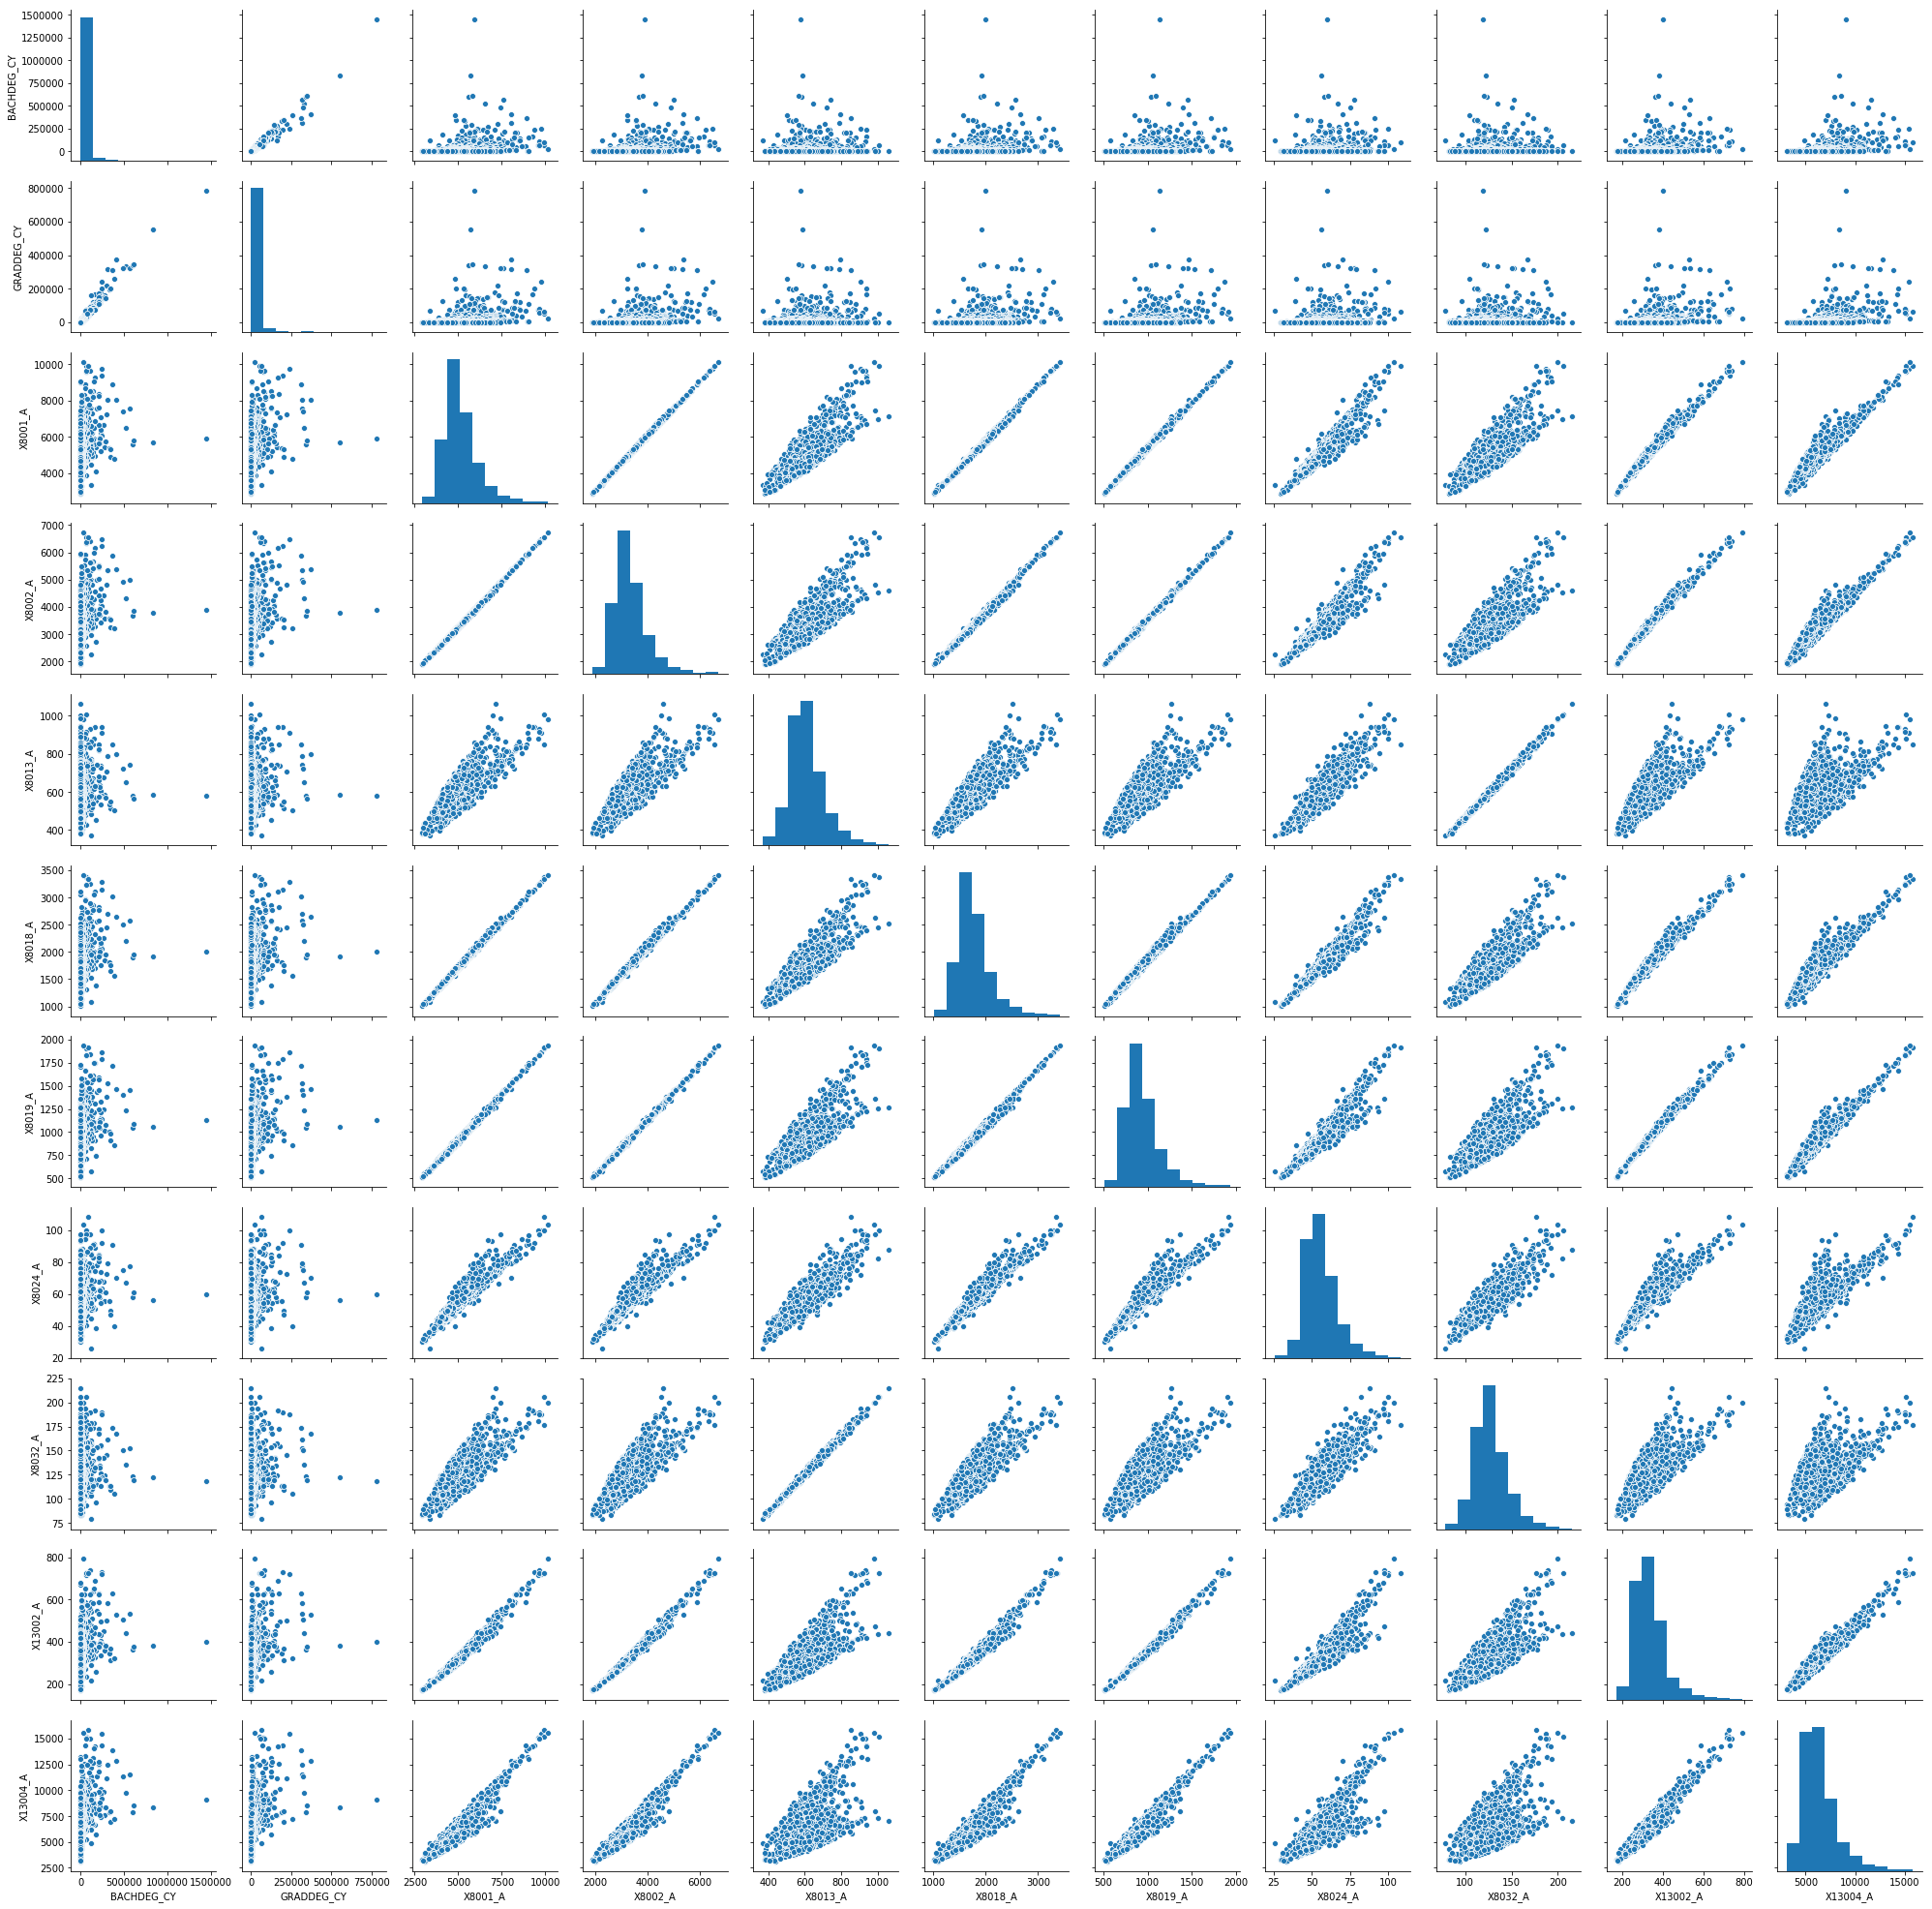

In [257]:
sns.pairplot(test_newcounty_df.iloc[:,19:])

(array([193., 132., 242., 213., 155., 101.,  62.,  42.,  13.,   4.]),
 array([0.        , 0.76468314, 1.52936628, 2.29404942, 3.05873256,
        3.8234157 , 4.58809883, 5.35278197, 6.11746511, 6.88214825,
        7.64683139]),
 <a list of 10 Patch objects>)

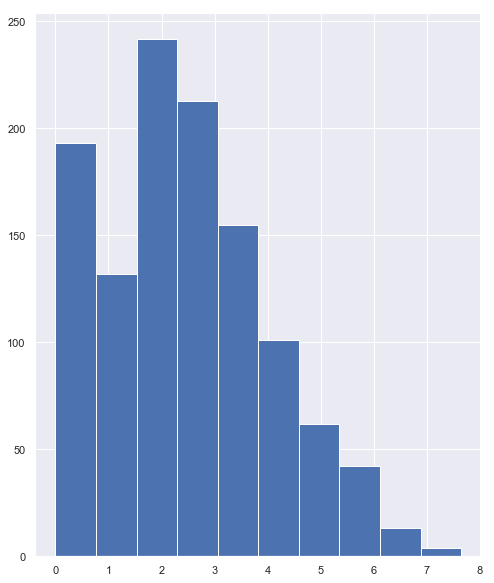

In [204]:
plt.hist(np.log(test_newcounty_df.iloc[:,2]), bins=10)

#### Correlation

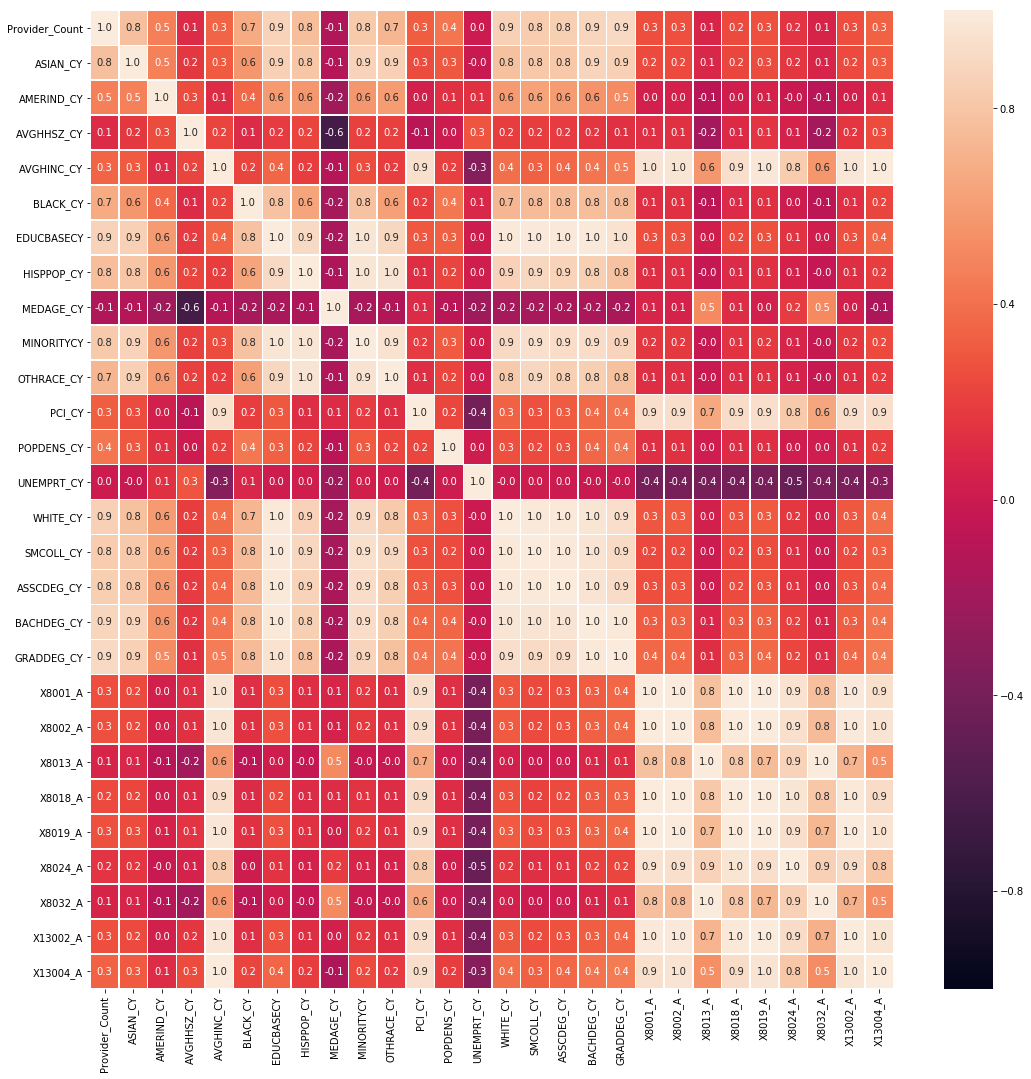

In [258]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(test_newcounty_df.corr(), vmin=-1.0, vmax=1.0, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [259]:
test_newcounty_df.head()

regionabbr           subregion  Provider_Count   ASIAN_CY  AMERIND_CY  \
0         CA  Los Angeles County           11400  1517296.0     73559.0   
1         MI      Oakland County            8112    95431.0      3461.0   
2         NY     New York County            7576   212844.0      8756.0   
3         FL   Miami-Dade County            7357    42319.0      5960.0   
4         IL         Cook County            6834   395712.0     21113.0   

   AVGHHSZ_CY  AVGHINC_CY   BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  \
0        3.00     94861.0   850350.0   6899087.0   5043293.0       35.7   
1        2.45    104439.0   176817.0    891271.0     51743.0       41.9   
2        2.00    136860.0   247085.0   1251653.0    441304.0       37.9   
3        2.85     74076.0   477399.0   1927223.0   1880878.0       39.1   
4        2.58     88254.0  1233716.0   3607345.0   1374256.0       36.6   

   MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  UNEMPRT_CY   WHITE_CY  \
0   7644196.0   2305030.0  31563.0      2535.5         4.5  5019340.0   
1    354337.0     13960.0  42427.0      1445.3         3.6   931347.0   
2    899778.0    193191.0  66805.0     72736.2         3.9   924396.0   
3   2374769.0     92152.0  25972.0      1438.5         6.0  2043088.0   
4   3078944.0    608672.0  34083.0      5579.2         6.9  2859209.0   

   SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  X8001_A  X8002_A  X8013_A  \
0  1300786.0    469649.0   1445895.0    782758.0  5905.52  3907.44   579.43   
1   185739.0     69135.0    236121.0    178686.0  7092.81  4677.71   737.81   
2   121070.0     48360.0    406878.0    371255.0  8035.56  5382.10   796.17   
3   299091.0    177135.0    347168.0    201433.0  4889.80  3236.30   514.74   
4   690225.0    237028.0    830433.0    552050.0  5692.87  3774.06   585.60   

   X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  X13004_A  
0  1998.08  1132.94    59.76   118.60    399.93   9046.16  
1  2415.10  1327.66    73.89   154.37    498.01  10106.34  
2  2653.46  1464.96    69.80   167.61    530.01  12793.70  
3  1653.50   907.46    49.41   109.80    313.81   6977.40  
4  1918.81  1061.74    56.05   122.50    381.05   8356.49

## Run models

### Define Response and Predictor Variables

In [38]:
# Create prdictor and response variables
train_x = test_newcounty_df.iloc[:,3:]
train_y = test_newcounty_df.iloc[:,2]
train_x.head()

ASIAN_CY  AMERIND_CY  AVGHHSZ_CY  AVGHINC_CY   BLACK_CY  EDUCBASECY  \
0  1517296.0     73559.0        3.00     94861.0   850350.0   6899087.0   
1    95431.0      3461.0        2.45    104439.0   176817.0    891271.0   
2   212844.0      8756.0        2.00    136860.0   247085.0   1251653.0   
3    42319.0      5960.0        2.85     74076.0   477399.0   1927223.0   
4   395712.0     21113.0        2.58     88254.0  1233716.0   3607345.0   

   HISPPOP_CY  MEDAGE_CY  MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  \
0   5043293.0       35.7   7644196.0   2305030.0  31563.0      2535.5   
1     51743.0       41.9    354337.0     13960.0  42427.0      1445.3   
2    441304.0       37.9    899778.0    193191.0  66805.0     72736.2   
3   1880878.0       39.1   2374769.0     92152.0  25972.0      1438.5   
4   1374256.0       36.6   3078944.0    608672.0  34083.0      5579.2   

   UNEMPRT_CY   WHITE_CY  SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  \
0         4.5  5019340.0  1300786.0    469649.0   1445895.0    782758.0   
1         3.6   931347.0   185739.0     69135.0    236121.0    178686.0   
2         3.9   924396.0   121070.0     48360.0    406878.0    371255.0   
3         6.0  2043088.0   299091.0    177135.0    347168.0    201433.0   
4         6.9  2859209.0   690225.0    237028.0    830433.0    552050.0   

   X8001_A  X8002_A  X8013_A  X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  \
0  5905.52  3907.44   579.43  1998.08  1132.94    59.76   118.60    399.93   
1  7092.81  4677.71   737.81  2415.10  1327.66    73.89   154.37    498.01   
2  8035.56  5382.10   796.17  2653.46  1464.96    69.80   167.61    530.01   
3  4889.80  3236.30   514.74  1653.50   907.46    49.41   109.80    313.81   
4  5692.87  3774.06   585.60  1918.81  1061.74    56.05   122.50    381.05   

   X13004_A  
0   9046.16  
1  10106.34  
2  12793.70  
3   6977.40  
4   8356.49

In [39]:
train_y.head()

0    11400
1     8112
2     7576
3     7357
4     6834
Name: Provider_Count, dtype: int64

### Base Model

In [40]:
import statsmodels.api as sm
import statsmodels
from statsmodels.regression import linear_model

In [41]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x)
# train_x_std = pd.DataFrame(train_x_std, columns=train_x.columns)
# train_x_std.head()

#### LR using Stats Models

In [42]:
X_train = train_x
X_train = sm.add_constant(X_train)
sm_ols = sm.OLS(train_y, X_train).fit() 

# Xscaled_train = train_x_std
# Xscaled_train = sm.add_constant(Xscaled_train)
# sm_ols = sm.OLS(train_y, Xscaled_train).fit() # i know, the param order is inverse
# sm_model = sm_ols.fit()

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
# sm_model.summary()
sm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Provider_Count   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     387.3
Date:                Tue, 06 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:04:03   Log-Likelihood:                -10049.
No. Observations:                1478   AIC:                         2.015e+04
Df Residuals:                    1450   BIC:                         2.030e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.1659    238.082      0.337      0.736    -386.856     547.188
ASIAN_CY      -0.0038      0.002     -2.125      0.034      -0.007      -0.000
AMERIND_CY    -0.0075      0.002     -3.524      0.000      -0.012      -0.003
AVGHHSZ_CY    90.8839     70.301      1.293      0.196     -47.019     228.786
AVGHINC_CY     0.0360      0.036      0.986      0.324      -0.036       0.108
BLACK_CY      -0.0029      0.002     -1.858      0.063      -0.006       0.000
EDUCBASECY     0.0059      0.001      7.312      0.000       0.004       0.008
HISPPOP_CY     0.0057      0.002      3.550      0.000       0.003       0.009
MEDAGE_CY     -5.4397      3.035     -1.792      0.073     -11.393       0.514
MINORITYCY    -0.0031      0.002     -1.913      0.056      -0.006    7.98e-05
OTHRACE_CY    -0.0083      0.001    -13.435      0.000      -0.010      -0.007
PCI_CY         0.0106      0.007      1.557      0.120      -0.003       0.024
POPDENS_CY     0.0205      0.004      5.140      0.000       0.013       0.028
UNEMPRT_CY    -0.8457      3.097     -0.273      0.785      -6.920       5.229
WHITE_CY      -0.0060      0.000    -12.005      0.000      -0.007      -0.005
SMCOLL_CY      0.0057      0.001      5.002      0.000       0.003       0.008
ASSCDEG_CY     0.0018      0.002      0.751      0.453      -0.003       0.006
BACHDEG_CY     0.0004      0.001      0.429      0.668      -0.001       0.002
GRADDEG_CY     0.0183      0.001     17.428      0.000       0.016       0.020
X8001_A      862.5392   1152.817      0.748      0.454   -1398.829    3123.907
X8002_A     -863.3257   1152.812     -0.749      0.454   -3124.683    1398.032
X8013_A       -4.9468      3.650     -1.355      0.176     -12.106       2.213
X8018_A     -856.2211   1152.954     -0.743      0.458   -3117.857    1405.415
X8019_A        4.2510      4.008      1.061      0.289      -3.611      12.113
X8024_A      -50.6298     16.889     -2.998      0.003     -83.759     -17.500
X8032_A      -17.1315     19.478     -0.880      0.379     -55.339      21.076
X13002_A       2.1864      2.336      0.936      0.349      -2.396       6.769
X13004_A      -1.2507      0.416     -3.005      0.003      -2.067      -0.434
==============================================================================
Omnibus:                     2662.724   Durbin-Watson:                   1.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6867015.382
Skew:                          12.111   Prob(JB):                         0.00
Kurtosis:                     336.048   Cond. No.                     2.01e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+08. This might i

In [44]:
# Calculate RMSE of model
from statsmodels.tools.eval_measures import rmse
pred_val = sm_ols.fittedvalues.copy()
rmse_base_ols = rmse(train_y, pred_val)
round(rmse_base_ols,2)

216.98

- The R-squared value of 0.962 shows that 96.2% of the variability in Provider Count is explained by the model. The R-squared value is too good to be true and the model seems to be overfitting.
 
- To identify variables that are statistically significant, we look at the p-values of individual variables. Among the coefficients, those that are statistically significant at 10% significance level are:  
    - ASIAN_CY, AVGHHSZ_CY, EDUCBASECY, MEDAGE_CY, PCI_CY, POPDENS_CY, ASSCDEG_CY, GRADDEG_CY, X8013_A, X8019_A, X13004_A.

- The p-value of F-statistic is less than 0.05 which shows that atleast one of the predicting variables has predicting power on the variability of Provider Count.

##### Verify Assumptions

In [266]:
# Assumptions
residual = sm_ols.resid

((array([-3.30857132, -3.05161173, -2.90872933, ...,  2.90872933,
          3.05161173,  3.30857132]),
  array([-1540.28922849, -1266.92973213, -1250.59295106, ...,
          1279.97068281,  1516.25085356,  5719.41346837])),
 (135.84237842312143, -5.559902383446611e-09, 0.6248177388379518))

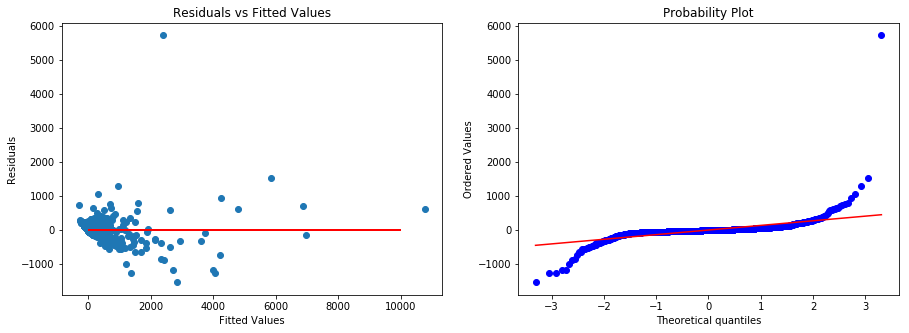

In [268]:
import scipy as sp
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Residuals vs Fitted
ax1.scatter(pred_val, residual)
ax1.hlines(y=0, xmin=0, xmax=10000, linewidth=2, color='r')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted Values')

# QQ plot
sp.stats.probplot(residual, plot=ax2, fit=True)

1. Residuals vs Fitted plot
    - **Constant Variance**: From the plot, we observe a departure from constant variance as the distance of data points from zero are not consistently equal. We can see that the residuals are closer to 0 in the beggining but values start to go up as we move a little towards the right of the plot.
    - **Independence**:  We see that the data is clustered together and is not randomly distributed. This indicates a slight departure from independence as clusters of residuals generally indicate correlation errors, or an indication that multicollinearity exists in parts of the data.


2. Probability Plot
    - **Normality**: From this plot, we can see that the residuals have tails on both the positive and negative side. Although the residuals stay close to The residuals are heavily tailed showing violation of Normality assumption.


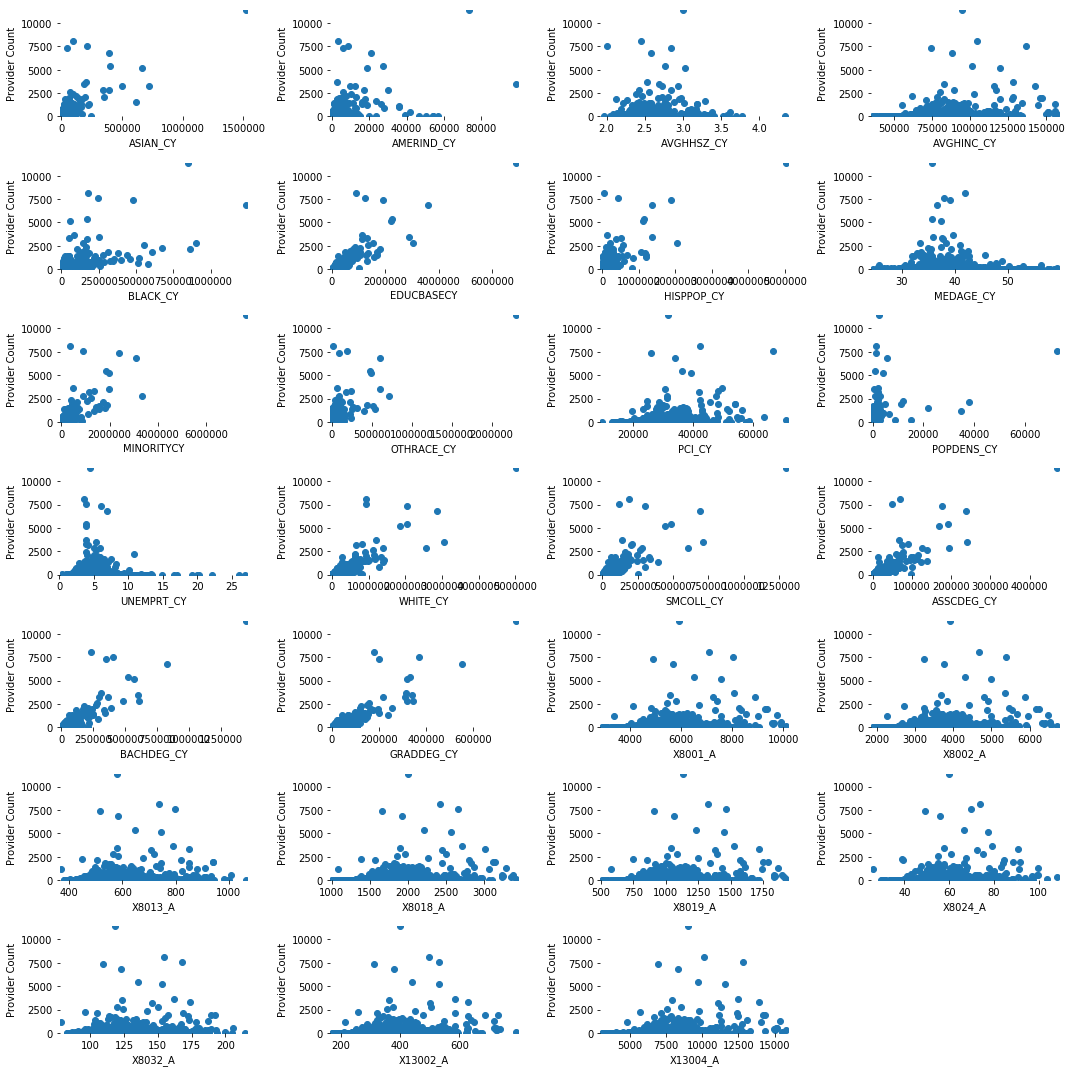

In [269]:
# Check Linearity - Plot predictors with response
states = test_newcounty_df.columns[3:]
fig = plt.figure(figsize=(15, 15))
for sp in range(0,27):
    ax = fig.add_subplot(7,4,sp+1)
#     provType = unique_df[unique_df['state']==states[sp]]['provider_type'].value_counts().reset_index()
#     ax.scatter(test_newcounty_df.iloc[:,2], test_newcounty_df.loc[:,states[sp]])
    ax.scatter(test_newcounty_df.loc[:,states[sp]], test_newcounty_df.iloc[:,2])
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Provider Count')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

1. Predictors vs Response
     - **Linearity** - From the plot above, we can see the each predictor variable is either strongly or weakly related to response variable. From this plot, we can sya that the Linearity assumption holds.

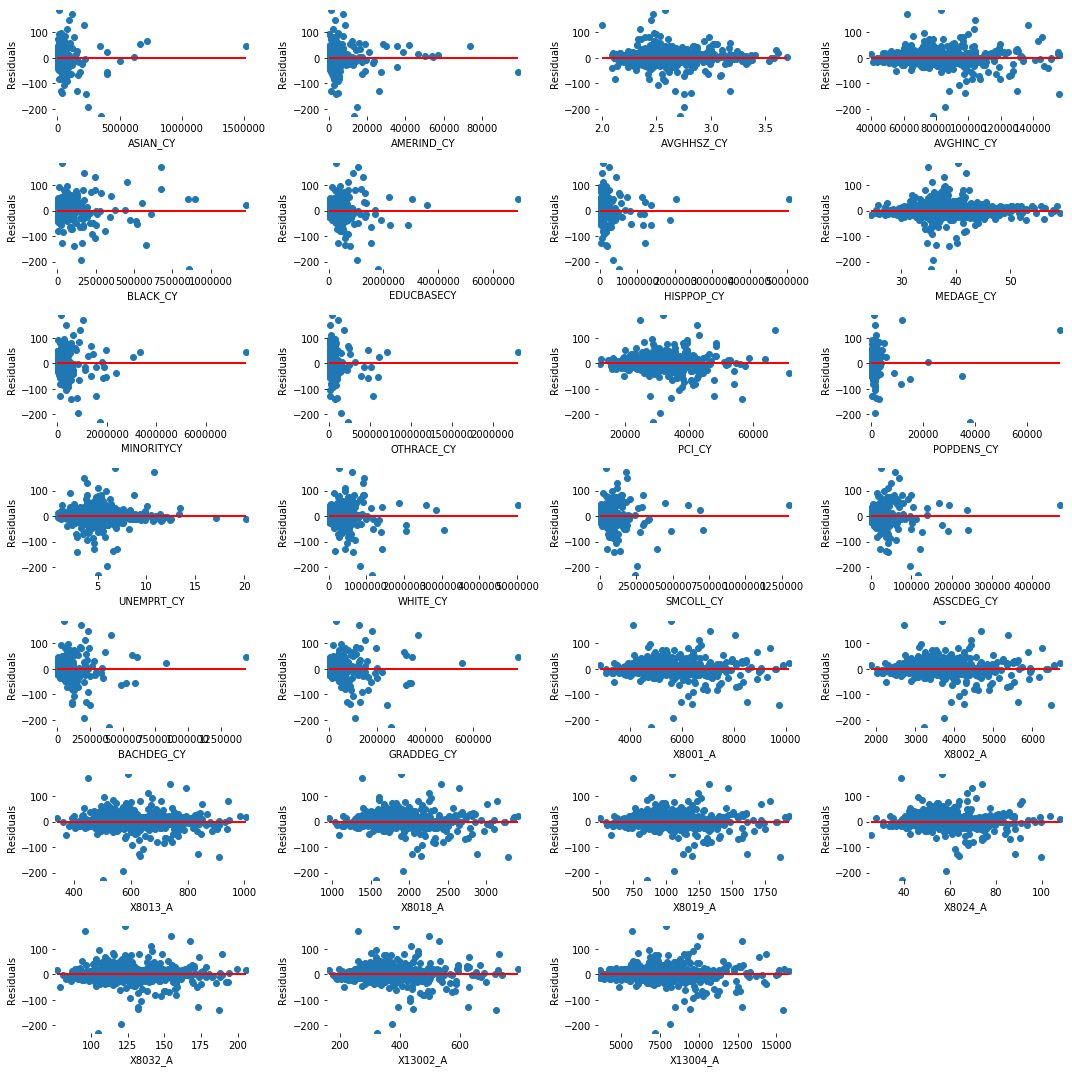

In [106]:
# Check Linearity - Plot predictors with residuals
states = test_newcounty_df.columns[3:]
fig = plt.figure(figsize=(15, 15))

for sp in range(0,27):
    mini = min(test_newcounty_df.loc[:,states[sp]])
    maxi = max(test_newcounty_df.loc[:,states[sp]])
    ax = fig.add_subplot(7,4,sp+1)
    ax.scatter(test_newcounty_df.loc[:,states[sp]], residual)
    ax.hlines(y=0, xmin=mini, xmax=maxi, linewidth=2, color='r')
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Residuals')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

##### Outlier Detection

One way to think about whether the results we have are driven by a given data point is to calculate how far the predicted values for data would move if model was fit without the data point in question. This calculated total distance is called Cook's distance. Cook's D is a function of the leverage and standardized residual associated with each data point. The influence of each point can be visualized using an Influence Plot.

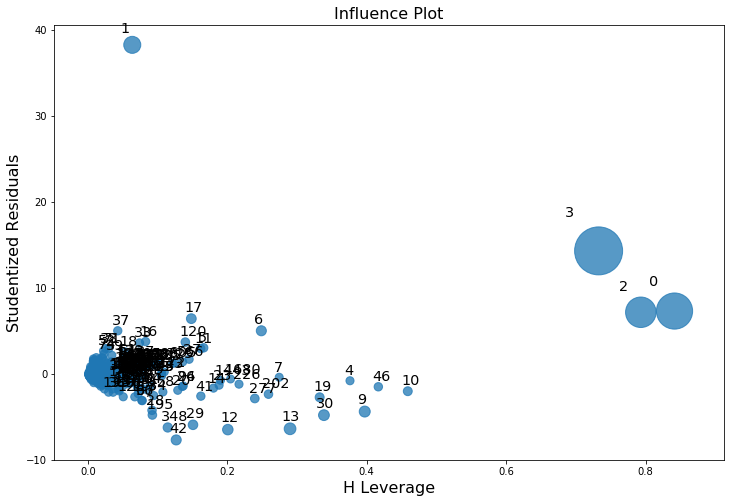

In [270]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(sm_ols, ax= ax, criterion="cooks")

From this plot, we can see that points towards the right (2, 0, 13) are away from both x and y axis and hence are influential points. Points 12, 49 and 11 are a little further from the axes but not as much as 2 and can be considered outliers.

##### Test removing outliers

In [54]:
test_newcounty_df.head(50)

regionabbr              subregion  Provider_Count   ASIAN_CY  AMERIND_CY  \
0          CA     Los Angeles County            2094  1517296.0     73559.0   
1          IL            Cook County            1586   395712.0     21113.0   
2          NY        New York County            1136   212844.0      8756.0   
3          TX          Harris County            1124   341640.0     30001.0   
4          AZ        Maricopa County             844   184150.0     98584.0   
5          CA          Orange County             668   667421.0     18749.0   
6          CA       San Diego County             646   401095.0     27438.0   
7          PA    Philadelphia County             636   118378.0      7744.0   
8          TX          Dallas County             623   170268.0     17668.0   
9          MI         Oakland County             572    95431.0      3461.0   
10         WA            King County             560   395459.0     17234.0   
11         NY           Kings County             521   346905.0     13068.0   
12         CA     Santa Clara County             519   721646.0     12394.0   
13         FL      Miami-Dade County             517    42319.0      5960.0   
14         GA          Fulton County             499    79638.0      2142.0   
15         MI           Wayne County             484    61221.0      7296.0   
16         NY          Nassau County             470   135762.0      3725.0   
17         FL         Broward County             442    70007.0      6003.0   
18         MO       St. Louis County             420    44317.0      2098.0   
19         TX         Tarrant County             400   114185.0     12805.0   
20         TX           Bexar County             399    58513.0     16563.0   
21         NY          Queens County             390   616629.0     15902.0   
22         OH        Cuyahoga County             379    40682.0      2559.0   
23         FL      Palm Beach County             379    39780.0      6004.0   
24         CA         Alameda County             366   501246.0      9664.0   
25         PA       Allegheny County             366    49510.0      1861.0   
26         NC     Mecklenburg County             361    66691.0      4856.0   
27         MN        Hennepin County             347    95783.0     10369.0   
28         TX          Travis County             343    86195.0      9017.0   
31         OH        Hamilton County             317    22235.0      1444.0   
32         NY         Suffolk County             317    63150.0      5873.0   
33         CT        Hartford County             313    49817.0      2992.0   
34         DC   District of Columbia             307    28505.0      2614.0   
36         NY     Westchester County             295    62160.0      4721.0   
37         VA         Fairfax County             293   227121.0      3739.0   
38         NJ          Bergen County             288   161749.0      2525.0   
40         CA  San Bernardino County             282   154148.0     23628.0   
41         CT       Fairfield County             281    54522.0      2722.0   
42         IL          DuPage County             264   112496.0      2354.0   
43         NY            Erie County             261    36357.0      6172.0   
44         UT       Salt Lake County             257    50721.0     11293.0   
45         PA          Lehigh County             257    13261.0      1474.0   
46         CT       New Haven County             254    37276.0      3027.0   
47         CA       Riverside County             252   157849.0     26478.0   
48         OK        Oklahoma County             251    30261.0     28149.0   
49         NY           Bronx County             251    58341.0     19024.0   
51         OR       Multnomah County             247    62565.0      8177.0   
52         FL           Duval County             244    46717.0      3633.0   
53         TX          Collin County             241   148227.0      5298.0   
54         RI      Providence County             234 

In [45]:
test_LA = test_newcounty_df.copy()
test_LA.drop([3,2,0,1,46,9,19,30,13,4,10,11,6,348,12,25,41,277,29,14,195,5,27,7,42,360,65], axis=0, inplace=True)

In [46]:
test_LA.shape

(1451, 30)

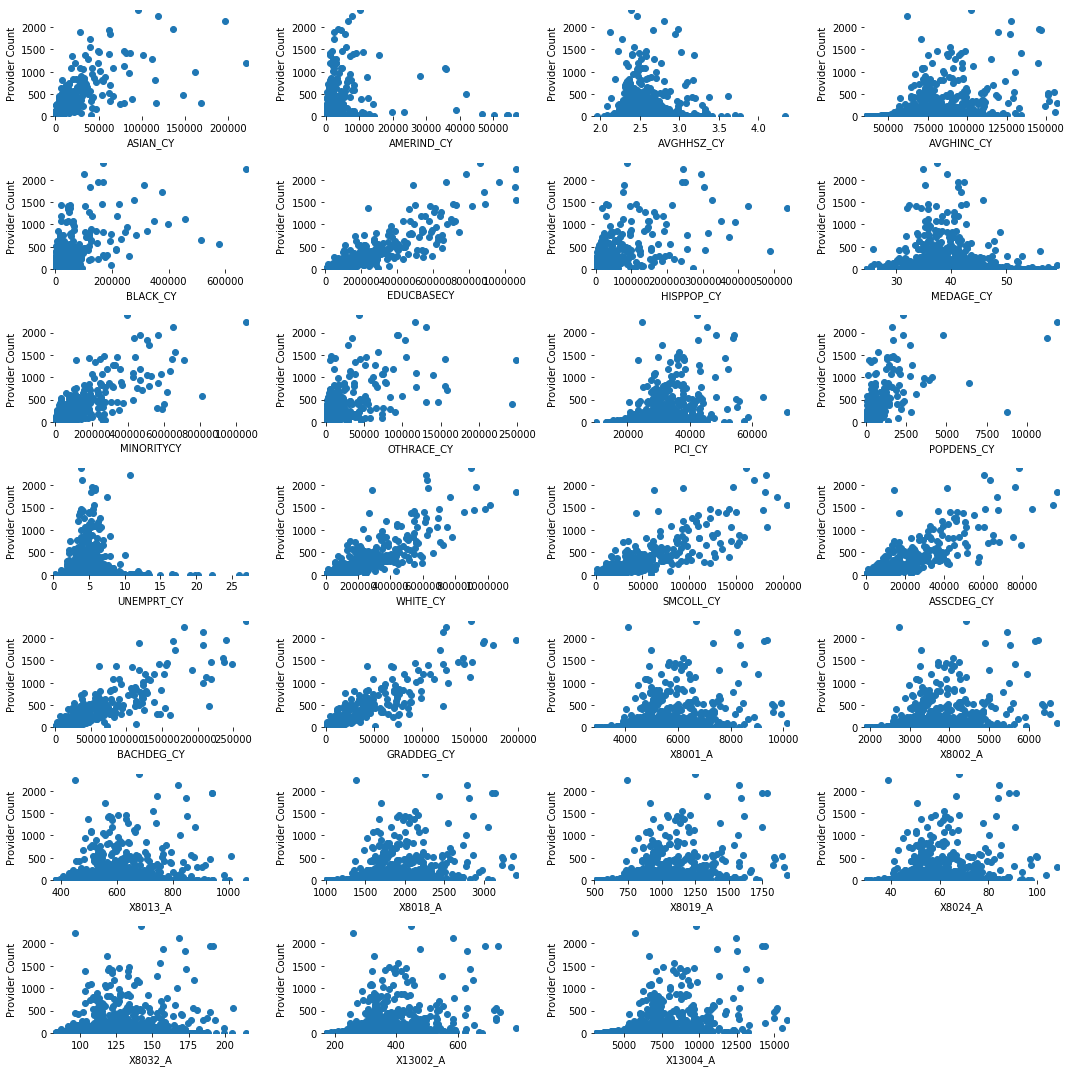

In [407]:
# Check Linearity - Plot predictors with response
states = test_LA.columns[3:]
fig = plt.figure(figsize=(15, 15))
for sp in range(0,27):
    ax = fig.add_subplot(7,4,sp+1)
#     provType = unique_df[unique_df['state']==states[sp]]['provider_type'].value_counts().reset_index()
#     ax.scatter(test_newcounty_df.iloc[:,2], test_newcounty_df.loc[:,states[sp]])
    ax.scatter(test_LA.loc[:,states[sp]], test_LA.iloc[:,2])
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Provider Count')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

In [47]:
# Create prdictor and response variables
train_x_LA = test_LA.iloc[:,3:]
train_y_LA = test_LA.iloc[:,2]
train_x.head()

ASIAN_CY  AMERIND_CY  AVGHHSZ_CY  AVGHINC_CY   BLACK_CY  EDUCBASECY  \
0  1517296.0     73559.0        3.00     94861.0   850350.0   6899087.0   
1    95431.0      3461.0        2.45    104439.0   176817.0    891271.0   
2   212844.0      8756.0        2.00    136860.0   247085.0   1251653.0   
3    42319.0      5960.0        2.85     74076.0   477399.0   1927223.0   
4   395712.0     21113.0        2.58     88254.0  1233716.0   3607345.0   

   HISPPOP_CY  MEDAGE_CY  MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  \
0   5043293.0       35.7   7644196.0   2305030.0  31563.0      2535.5   
1     51743.0       41.9    354337.0     13960.0  42427.0      1445.3   
2    441304.0       37.9    899778.0    193191.0  66805.0     72736.2   
3   1880878.0       39.1   2374769.0     92152.0  25972.0      1438.5   
4   1374256.0       36.6   3078944.0    608672.0  34083.0      5579.2   

   UNEMPRT_CY   WHITE_CY  SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  \
0         4.5  5019340.0  1300786.0    469649.0   1445895.0    782758.0   
1         3.6   931347.0   185739.0     69135.0    236121.0    178686.0   
2         3.9   924396.0   121070.0     48360.0    406878.0    371255.0   
3         6.0  2043088.0   299091.0    177135.0    347168.0    201433.0   
4         6.9  2859209.0   690225.0    237028.0    830433.0    552050.0   

   X8001_A  X8002_A  X8013_A  X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  \
0  5905.52  3907.44   579.43  1998.08  1132.94    59.76   118.60    399.93   
1  7092.81  4677.71   737.81  2415.10  1327.66    73.89   154.37    498.01   
2  8035.56  5382.10   796.17  2653.46  1464.96    69.80   167.61    530.01   
3  4889.80  3236.30   514.74  1653.50   907.46    49.41   109.80    313.81   
4  5692.87  3774.06   585.60  1918.81  1061.74    56.05   122.50    381.05   

   X13004_A  
0   9046.16  
1  10106.34  
2  12793.70  
3   6977.40  
4   8356.49

### Feature Selection and Importance

Our regression model results showed only few predictors that were statistically significant in predicting provider count. Feature selection is used to select those features in data that contribute most to the response variable. Having irrelevant features in the data can decrease the accuracy of many models, especially linear algorithms. To identify which predictors play a key role and remove predictors that are not statistically significant, we can use various feature selection techniques.

Greedy algorithms like Stepwise Regression and Recursive Feature Elimination (RFE) work by adding or removing attributes one at a time and building a model on those attributes that remain. RFE algorithm recursively removes attributes and uses accuracy metric to rank the feature according to their importance.

Regularization methods like Lasso and ElasticNet seek to minimize the complexity (magnitude  and  number  of  regression  coefficients) of the model by penalizing a feature given a coefficient threshold.
 - LASSO penalizes the sum of absolute value of regression coefficients thereby forcing many coefficients to 0.
 
 - ElasticNet combines the properties of both LASSO and Ridge regression.  It penalizes the model by using both the L2-norm (sum of squared values of coefficients) and the L1-norm (sum of absolute value of coefficients) thereby shrinking some coefficients closer to 0 to reduce variance and making other coefficients 0.
 
Feature importance techniques like Random Forest are used to select features using a trained supervised classifier. Random forest consists of a number of decision trees where each node in a tree is a condition on a single feature, designed to split the dataset. 

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
# from sklearn.linear_model import Ridge
# from sklearn.feature_selection import f_regression
# from sklearn.feature_selection import SelectKBest
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR

In [49]:
# # Test options and evaluation metric
# num_folds = 10
# seed = 7
# scoring ='neg_mean_squared_error'

In [50]:
# Spot-Check Algorithms
# models = []
# models.append(('LR', LinearRegression()))
# models.append(('LASSO', Lasso()))
# models.append(('EN', ElasticNet()))
# models.append(('KNN', KNeighborsRegressor()))
# models.append(('CART', DecisionTreeRegressor()))
# models.append(('SVR', SVR()))

In [51]:
# # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
#     kfold = KFold(n_splits=num_folds, random_state=seed)
#     cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

In [52]:
# # Compare Algorithms
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

#### Run Feature Selection Algorithms

In [53]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring ='neg_mean_squared_error'

In [54]:
# Standardize the dataset
clf = LinearRegression()
pipelines = []
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledRFECV', Pipeline([('Scaler', StandardScaler()),('RFECV',RFECV(estimator=clf, cv=5))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor(n_estimators = 100))])))
# pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('Ridge',Ridge())])))
# pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
# pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
# pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR',SVR())])))
# pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))

In [55]:
import math
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, train_x_LA, train_y_LA, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, math.sqrt(abs(cv_results.mean())), cv_results.std())
    print(msg)
#     print("RMSE: %.3f" % (math.sqrt(abs(cv_results.mean()))))

ScaledLASSO: 158.136585 (68191.233984)
ScaledEN: 165.425874 (75351.707675)
ScaledRFECV: 168.433757 (76916.016981)
ScaledRF: 230.875678 (150859.538269)


From the results above, Lasso seems to be the most promising with lowest RMSE. Let's explore Lasso to see which variables are selected by this model.

#### Run Lasso

In [56]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x_LA)

In [57]:
# Run Lasso Model
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
lasso_model=Lasso()
# lasso_model = RFECV(estimator=clf, cv=5)
# lasso_model=ElasticNet()

lasso_model.fit(train_x_std,train_y_LA)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
# For RFECV
# sorted(zip(map(lambda x: round(x, 4), lasso_model.ranking_), train_x_LA.columns))
# rfe_cols = [f for f,s in zip(train_x_LA.columns, lasso_model.support_) if s]
# rfe_cols

In [59]:
# Identify how many coefficients are picked
coef = pd.Series(lasso_model.coef_, index = train_x.columns)
# coef = pd.Series(lasso_model.estimator_.coef_, index = rfe_cols)

print("Model picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Model picked 15 variables and eliminated the other 12 variables


In [60]:
# coef


In [61]:
# List coefficients picked by model
imp_coef = pd.concat([coef.sort_values(ascending=False).head(9),
                     coef.sort_values(ascending=False).tail(6)])

# imp_coef = coef.sort_values(ascending=False).head(20)
imp_coef

GRADDEG_CY    208.369667
OTHRACE_CY     41.099565
SMCOLL_CY      32.444988
ASSCDEG_CY     16.242065
POPDENS_CY     15.060667
AMERIND_CY      1.738594
X8013_A         1.368253
ASIAN_CY        1.094968
UNEMPRT_CY      0.134316
BLACK_CY       -1.070632
MEDAGE_CY      -9.747561
HISPPOP_CY    -12.241718
AVGHHSZ_CY    -15.434832
X13004_A      -19.490515
BACHDEG_CY    -37.626106
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Model')

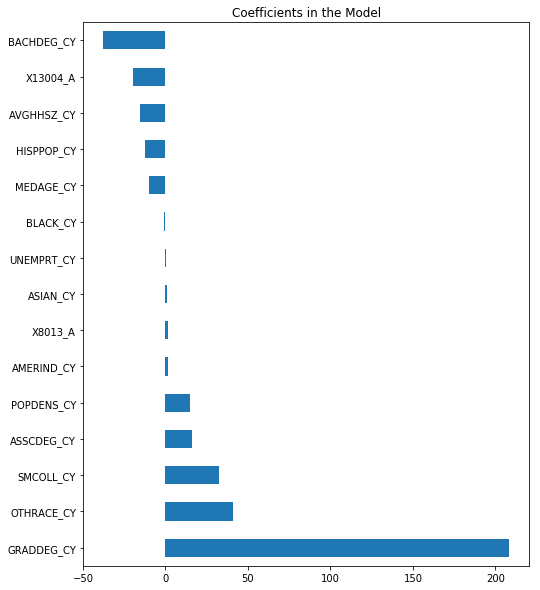

In [62]:
# Plot coefficients picked by model along with their importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

### Regression with Selected Features

In the base model, we saw deviations from linearity, constant variance and independence assumptions. The model also seemed to overfit data with an R-squared value of 0.96. 

__For Linearity__ - If a model does not fit well, it does not mean that the regression is not useful. One problem could be that the relation between one or more predictors and the response is not linear.

__For Constant Variance and Independence__ - If normality or the constant variance do not hold, then we transform the response variable. A common transformation is the power transformation of y to the lambda, also called the Box-Cox transformation.

Here we will use the features selected by lasso model, standardize the predicting variables and transform the response to create a regression model on our data.

In [425]:
# Subset important predictors
train_x_lasso = test_LA.loc[:,imp_coef.index]
train_x_lasso.head()

GRADDEG_CY  OTHRACE_CY  SMCOLL_CY  ASSCDEG_CY  POPDENS_CY  AMERIND_CY  \
16    151277.0     44229.0   161014.0     78418.0      2269.8     10369.0   
17    124886.0    117203.0   182434.0     60266.0     11869.9      7744.0   
18    121598.0    130941.0   169667.0     63393.0      1597.1      6681.0   
20    198145.0     93346.0   146621.0     76632.0      4805.5      3725.0   
22    164681.0     94797.0    93481.0     41665.0      2269.6      4721.0   

    X8013_A  ASIAN_CY  UNEMPRT_CY  BLACK_CY  MEDAGE_CY  HISPPOP_CY  \
16   677.71   95783.0         3.9  166746.0       37.4     88522.0   
17   450.21  118378.0        10.8  673651.0       34.9    243837.0   
18   818.85  196318.0         4.0  102526.0       39.3    296673.0   
20   941.09  135762.0         5.4  168075.0       42.4    242411.0   
22   938.77   62160.0         5.9  148832.0       41.2    250091.0   

    AVGHHSZ_CY  X13004_A  BACHDEG_CY  
16        2.39   9795.97    268077.0  
17        2.47   5711.26    180690.0  
18        2.80  12428.76    208002.0  
20        2.98  14346.36    239124.0  
22        2.67  14194.42    165761.0

In [448]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
# from scipy.stats import log
from numpy import log
sc_data = StandardScaler()
train_x_std_lasso = sc_data.fit_transform(train_x_lasso)
# train_y_log = log(test_newcounty_df.iloc[:,2])
# train_y_box = boxcox(test_LA.iloc[:,2], lmbda=0)
train_y_box = np.log(test_LA.iloc[:,2])

# train_y_box,fitted_lambda = stats.boxcox(train_y)
# train_y_box = pd.Series(stats.boxcox(train_y))

In [449]:
X_train_lasso = sm.add_constant(train_x_lasso)
sm_ols_lasso = sm.OLS(train_y_box, X_train_lasso).fit() 

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [450]:
sm_ols_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Provider_Count   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     256.4
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        08:58:25   Log-Likelihood:                -2044.3
No. Observations:                1451   AIC:                             4121.
Df Residuals:                    1435   BIC:                             4205.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8601      0.621     15.880      0.000       8.642      11.078
GRADDEG_CY  1.686e-05   6.47e-06      2.607      0.009    4.17e-06    2.95e-05
OTHRACE_CY  3.291e-06   5.81e-06      0.567      0.571    -8.1e-06    1.47e-05
SMCOLL_CY   3.668e-05   5.54e-06      6.625      0.000    2.58e-05    4.75e-05
ASSCDEG_CY  3.733e-05   1.08e-05      3.456      0.001    1.61e-05    5.85e-05
POPDENS_CY  7.717e-05   6.41e-05      1.204      0.229   -4.85e-05       0.000
AMERIND_CY  2.276e-05   7.02e-06      3.240      0.001    8.98e-06    3.65e-05
X8013_A       -0.0082      0.000    -16.766      0.000      -0.009      -0.007
ASIAN_CY   -6.258e-06   3.14e-06     -1.995      0.046   -1.24e-05   -1.06e-07
UNEMPRT_CY     0.0413      0.013      3.112      0.002       0.015       0.067
BLACK_CY   -2.686e-06   9.98e-07     -2.691      0.007   -4.64e-06   -7.28e-07
MEDAGE_CY     -0.0229      0.009     -2.675      0.008      -0.040      -0.006
HISPPOP_CY -1.609e-06   2.46e-06     -0.654      0.513   -6.43e-06    3.22e-06
AVGHHSZ_CY    -2.4389      0.183    -13.291      0.000      -2.799      -2.079
X13004_A       0.0007   2.73e-05     24.314      0.000       0.001       0.001
BACHDEG_CY -2.467e-05   5.27e-06     -4.677      0.000    -3.5e-05   -1.43e-05
==============================================================================
Omnibus:                       65.943   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.443
Skew:                          -0.480   Prob(JB):                     5.61e-18
Kurtosis:                       3.626   Cond. No.                     2.02e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The expected change in sqrt(y=Provider Count) with respect to a one-unit increase in Graduate Degree holding all other variables constant is 1.78. This means that for one-unit increase in Graduate Degree, the sqrt(y=Provider Count) will increase by .000037 holding all other predictors fixed.
1. GRADDEG_CY - The coefficient is 1.68e-05. This means that for one-unit increase in graduate degree, Provider Count will increase by 0.0017% ((exp(0.0000168)-1)*100) holding all other predictors fixed. OR  for 1000 unit increase in graduate degree, Provider Count will increase by 1.7%. 

2. SMCOLL_CY - The coefficient is 3.67e-05. This means that for one-unit increase in people who attended some college, Provider Count will increase by 0.0037% holding all other predictors fixed. OR  for 1000 unit increase in other race, Provider Count will increase by 3.7%.

3. ASSCDEG_CY - The coefficient is 3.73e-05. This means that for one-unit increase in people with associates degree, Provider Count will increase by 0.0037% holding all other predictors fixed. OR  for 1000 unit increase in people with associates degree, Provider Count will increase by 3.7%.

4. AMERIND_CY - The coefficient is 2.28e-05. This means that for one-unit increase in American Indian population, Provider Count will increase by 0.0023% holding all other predictors fixed. OR  for 1000 unit increase in American Indian population, Provider Count will increase by 2.3%.

5. X8013_A - The coefficient is -0.0082. This means that for one-unit increase in average medicare payments, Provider Count will reduce by 0.82% holding all other predictors fixed. 

6. BLACK_CY - The coefficient is 2.686e-06. This means that for one-unit increase in Black population, Provider Count will reduce by 0.000268% holding all other predictors fixed. OR  for 1000 unit increase in Black population, Provider Count will reduce by 0.27%.

7. MEDAGE_CY - The coefficient is -0.0229. This means that for one-unit increase in Median Age, Provider Count will reduce by 2.3% holding all other predictors fixed. 

8. AVGHHSZ_CY - The coefficient is -2.4389. This means that for one-unit increase in Avg. Household Size, Provider Count will reduce by 1046% holding all other predictors fixed. 

9. X13004_A - The coefficient is -0.0007. This means that for one-unit increase in average pension and social security, Provider Count will increase by 0.07% holding all other predictors fixed.
 

In [451]:
# Calculate RMSE of new model
pred_val = sm_ols_lasso.fittedvalues.copy()
new_rmse = rmse(train_y_box, pred_val)
new_rmse

0.9900359781050364

In [1]:
sm_ols_lasso.conf_int(alpha=0.05, cols=None)

NameError: name 'sm_ols_lasso' is not defined

#### Verify Assumptions

In [437]:
# Assumptions
# pred_val = sm_ols_lasso.fittedvalues.copy()
# true_val = train_y_log
residual = sm_ols_lasso.resid

((array([-3.30340654, -3.04607408, -2.90296155, ...,  2.90296155,
          3.04607408,  3.30340654]),
  array([-4.58723071, -4.19738059, -3.86879067, ...,  2.47505151,
          2.70862935,  2.71252112])),
 (0.9854744007154336, 5.08937997488561e-15, 0.9933983026710633))

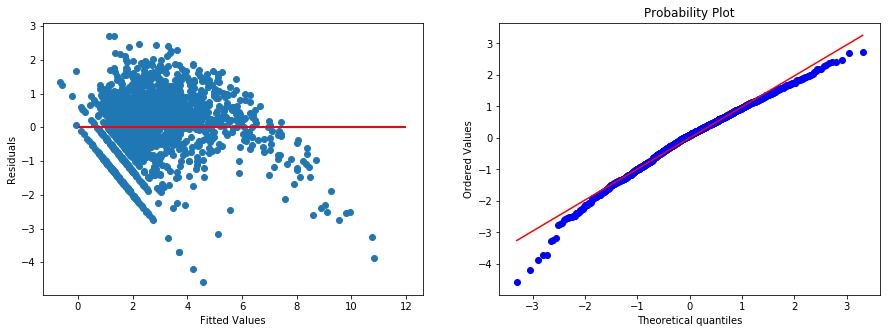

In [438]:
import scipy as sp
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Residuals vs Fitted
ax1.scatter(pred_val, residual)
ax1.hlines(y=0, xmin=0, xmax=12, linewidth=2, color='r')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# QQ plot
sp.stats.probplot(residual, plot=ax2, fit=True)

#### Outlier

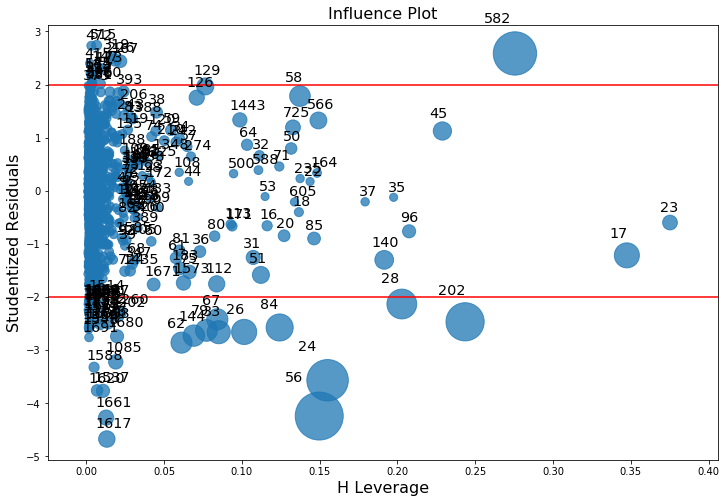

In [440]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(sm_ols_lasso, ax= ax, criterion="cooks")
h = plt.axhline(y=2, color='r')
l = plt.axhline(y=-2, color='r')

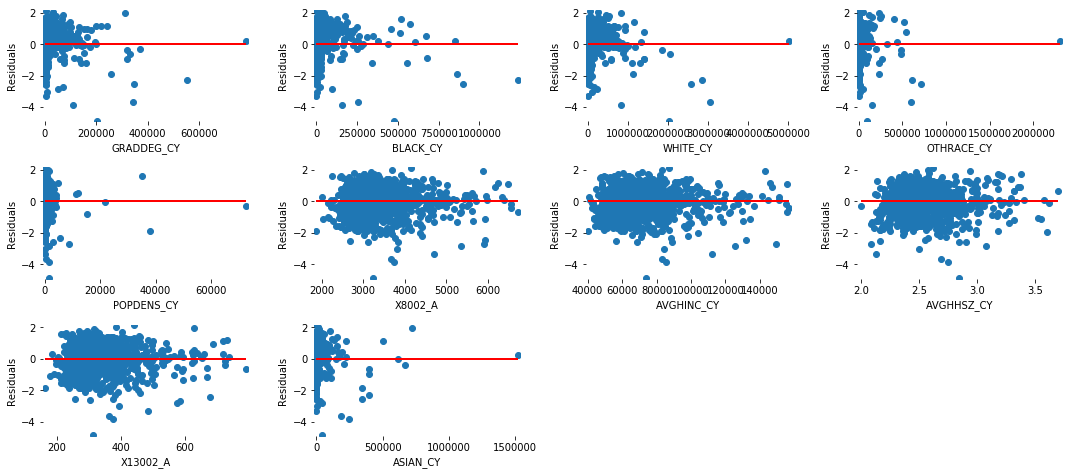

In [237]:
# Check Linearity - Plot predictors with residuals
states = train_x_lasso.columns
fig = plt.figure(figsize=(15, 15))

for sp in range(0,10):
    mini = min(test_newcounty_df.loc[:,states[sp]])
    maxi = max(test_newcounty_df.loc[:,states[sp]])
    ax = fig.add_subplot(7,4,sp+1)
    ax.scatter(test_newcounty_df.loc[:,states[sp]], residual)
    ax.hlines(y=0, xmin=mini, xmax=maxi, linewidth=2, color='r')
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Residuals')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

### Ensemble Models

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [176]:
ensemble = []
ensemble.append(('ScaledAB',Pipeline([('Scalar',StandardScaler()),('AB',AdaBoostRegressor())])))
ensemble.append(('ScaledGB',Pipeline([('Scalar',StandardScaler()),('AB',GradientBoostingRegressor())])))
ensemble.append(('ScaledRF',Pipeline([('Scalar',StandardScaler()),('AB',RandomForestRegressor(n_estimators=10))])))
ensemble.append(('ScaledET',Pipeline([('Scalar',StandardScaler()),('AB',ExtraTreesRegressor(n_estimators=10))])))

In [177]:
import math
results = []
names = []
for name, model in ensemble:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, math.sqrt(abs(cv_results.mean())), cv_results.std())
    print(msg)

ScaledAB: 121.154282 (40507.045559)
ScaledGB: 118.122984 (40971.205377)
ScaledRF: 115.705741 (39125.193651)
ScaledET: 120.559273 (42396.388592)


### Run Random Forest

In [93]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [94]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_x.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: EDUCBASECY           Importance: 0.63
Variable: WHITE_CY             Importance: 0.1
Variable: MINORITYCY           Importance: 0.07
Variable: OTHRACE_CY           Importance: 0.05
Variable: HISPPOP_CY           Importance: 0.03
Variable: ASIAN_CY             Importance: 0.02
Variable: BLACK_CY             Importance: 0.02
Variable: POPDENS_CY           Importance: 0.02
Variable: AMERIND_CY           Importance: 0.01
Variable: AVGHHSZ_CY           Importance: 0.01
Variable: PCI_CY               Importance: 0.01
Variable: AVGHINC_CY           Importance: 0.0
Variable: MEDAGE_CY            Importance: 0.0
Variable: UNEMPRT_CY           Importance: 0.0
Variable: X8001_A              Importance: 0.0
Variable: X8002_A              Importance: 0.0
Variable: X8013_A              Importance: 0.0
Variable: X8018_A              Importance: 0.0
Variable: X8019_A              Importance: 0.0
Variable: X8024_A              Importance: 0.0
Variable: X8032_A              Importance: 0.0
Var

### Run LR

In [244]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x)

In [245]:
import math
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
results = cross_val_score(model, train_x_std, train_y, cv=kfold, scoring='neg_mean_squared_error')
print("Negative MSE: %.3f (%.3f)" % (results.mean(), results.std()))
print("RMSE: %.3f" % (math.sqrt(abs(results.mean()))))

Negative MSE: -4831.535 (13736.022)
RMSE: 69.509


In [243]:
model.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [242]:
coef = pd.Series(model.coef_, index = train_x.columns)
imp_coef = pd.concat([coef.sort_values(ascending=False)])
imp_coef

AttributeError: 'LinearRegression' object has no attribute 'coef_'

### Run Ridge

In [186]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x)

In [187]:
from sklearn.linear_model import Ridge
ridge_model=Ridge()
ridge_model.fit(train_x_std,train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [188]:
coef = pd.Series(ridge_model.coef_, index = train_x.columns)
print("Lasso model picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso model picked 27 variables and eliminated the other 0 variables


In [190]:
imp_coef = pd.concat([coef.sort_values(ascending=False)])
imp_coef

GRADDEG_CY    77.239684
EDUCBASECY    68.738600
X8019_A       51.208393
PCI_CY        36.519822
X8018_A       29.029839
WHITE_CY      19.454203
X13002_A      13.596778
BLACK_CY      12.973936
OTHRACE_CY    12.243136
BACHDEG_CY     9.790354
AVGHHSZ_CY     5.667606
POPDENS_CY     4.967631
MINORITYCY     1.426801
UNEMPRT_CY     0.561316
X8032_A        0.018115
AMERIND_CY    -1.456211
SMCOLL_CY     -2.470270
X8001_A       -3.608464
MEDAGE_CY     -4.718549
HISPPOP_CY    -6.838733
X8024_A       -6.981113
X8013_A      -17.628532
ASIAN_CY     -19.852558
X8002_A      -19.854157
X13004_A     -42.277273
ASSCDEG_CY   -49.270634
AVGHINC_CY   -52.111574
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

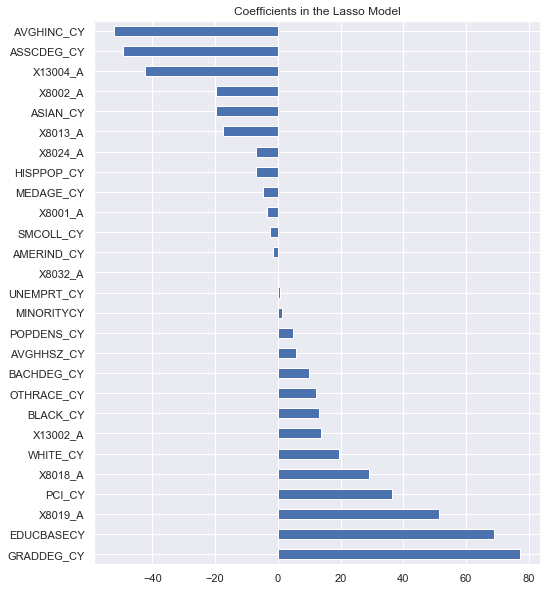

In [191]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

From the analysis above, we can see that factors that are predictive of higher provider count are:
- GRADDEG_CY (2018 Education: Graduate/Professional Degree (Esri))
- HINC15_CY (Household Income $15000 - $24999 (Esri))
- POPDENS_CY (2018 Population Density (Pop per Square Mile) (Esri))
- UNEMP_CY (2018 Unemployed Population Age 16+ (Esri))
- NHSPBLK_CY (2018 Black/African American Non-Hispanic Population (Esri))
- AGGINC_CY (2018 Aggregate Income (Esri))
- AGGHINC_CY (2018 Aggregate Household Income (Esri))
- HINC0_CY (Household Income less than $15000 (Esri))
- GQPOP_CY (2018 Group Quarters Population (Esri))
- HISPOTH_CY (2018 Hispanic Other Race Population (Esri))

Factors that negatively influence provider count are:
- HISPBLK_CY (2018 Hispanic Black/African American Population (Esri))
- NHSPOTH_CY (2018 Other Race Non-Hispanic Population (Esri))
- PIFBASE_CY (2018 Pacific Islander Female Population by Age Base (Esri))

### Run Elastic Net

ElasticNet combines the properties of both Ridge and LASSO regression.  It seeks to minimize the complexity of the model (magnitude  and  number  of  regression  coefficients)  by  penalizing  the  model  using  both  the L2-norm (sum squared coefficient values) and the L1-norm (sum absolute coefficient values).

In [192]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
from scipy import stats
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x)

In [193]:
from sklearn.linear_model import Lasso
elastic_model=ElasticNet()
elastic_model.fit(train_x_std,train_y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [194]:
coef = pd.Series(elastic_model.coef_, index = train_x.columns)
print("ElasticNet model picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

ElasticNet model picked 20 variables and eliminated the other 7 variables


In [199]:
coef

ASIAN_CY       3.947739
AMERIND_CY     1.408611
AVGHHSZ_CY    -4.172749
AVGHINC_CY     0.453336
BLACK_CY      15.468153
EDUCBASECY    11.774654
HISPPOP_CY     4.213778
MEDAGE_CY     -1.883922
MINORITYCY     7.671412
OTHRACE_CY     4.555564
PCI_CY         3.504828
POPDENS_CY     9.963559
UNEMPRT_CY     1.127128
WHITE_CY      12.620984
SMCOLL_CY      9.748853
ASSCDEG_CY     7.980145
BACHDEG_CY    14.850023
GRADDEG_CY    18.869037
X8001_A        0.000000
X8002_A        0.000000
X8013_A       -0.000000
X8018_A       -0.000000
X8019_A        0.000000
X8024_A       -0.620345
X8032_A       -0.000000
X13002_A      -0.000000
X13004_A       0.058779
dtype: float64

In [197]:
imp_coef = pd.concat([coef.sort_values(ascending=False).head(17),
                     coef.sort_values(ascending=False).tail(3)])
imp_coef

GRADDEG_CY    18.869037
BLACK_CY      15.468153
BACHDEG_CY    14.850023
WHITE_CY      12.620984
EDUCBASECY    11.774654
POPDENS_CY     9.963559
SMCOLL_CY      9.748853
ASSCDEG_CY     7.980145
MINORITYCY     7.671412
OTHRACE_CY     4.555564
HISPPOP_CY     4.213778
ASIAN_CY       3.947739
PCI_CY         3.504828
AMERIND_CY     1.408611
UNEMPRT_CY     1.127128
AVGHINC_CY     0.453336
X13004_A       0.058779
X8024_A       -0.620345
MEDAGE_CY     -1.883922
AVGHHSZ_CY    -4.172749
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

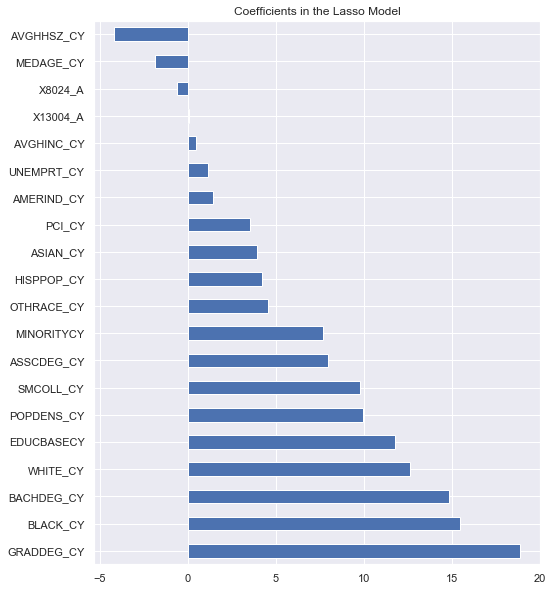

In [198]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

### Add new columns - Provider Density

In [63]:
add_columns_df = test_newcounty_df.copy()

In [64]:
add_columns_df['WhitePop_Density'] = add_columns_df['WHITE_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['BlackPop_Density'] = add_columns_df['BLACK_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['WhitePop_Density'] = add_columns_df['WHITE_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['AmeIndPop_Density'] = add_columns_df['AMERIND_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['AsianPop_Density'] = add_columns_df['ASIAN_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['PacificPop_Density'] = add_columns_df['PACIFIC_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['OtherPop_Density'] = add_columns_df['OTHRACE_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['HispanicPop_Density'] = add_columns_df['HISPPOP_CY']/add_columns_df['TOTPOP_CY']
add_columns_df['Provider_Density'] = add_columns_df['Provider_Count']/add_columns_df['TOTPOP_CY']

In [65]:
# Check Datatypes of different columns
g = add_columns_df.columns.to_series().groupby(add_columns_df.dtypes).groups
g

{dtype('int64'): Index(['Provider_Count'], dtype='object'),
 dtype('float64'): Index(['AAGEBASECY', 'AGGDI_CY', 'AGGHINC_CY', 'AGGINC_CY', 'AGGNW_CY',
        'AIFBASE_CY', 'AIMBASE_CY', 'AMERIND_CY', 'AREA', 'ASIAN_CY',
        ...
        'WHTMBASECY', 'WIDOWED_CY', 'WhitePop_Density', 'BlackPop_Density',
        'AmeIndPop_Density', 'AsianPop_Density', 'PacificPop_Density',
        'OtherPop_Density', 'HispanicPop_Density', 'Provider_Density'],
       dtype='object', length=179),
 dtype('O'): Index(['RegionAbbr', 'Subregion'], dtype='object')}

In [66]:
add_columns_df.head()

RegionAbbr           Subregion  Provider_Count  AAGEBASECY      AGGDI_CY  \
0         CA  Los Angeles County            2094   1517296.0  2.359152e+11   
1         IL         Cook County            1586    395712.0  1.284204e+11   
2         NY     New York County            1136    212844.0  6.672674e+10   
3         TX       Harris County            1124    341640.0  1.132993e+11   
4         AZ     Maricopa County             844    184150.0  1.043304e+11   

     AGGHINC_CY     AGGINC_CY      AGGNW_CY  AIFBASE_CY  AIMBASE_CY  \
0  3.196410e+11  3.247511e+11  2.224411e+12     35957.0     37602.0   
1  1.771502e+11  1.797564e+11  1.326345e+12     10418.0     10695.0   
2  1.091191e+11  1.109282e+11  4.008776e+11      4542.0      4214.0   
3  1.470200e+11  1.487312e+11  1.000460e+12     14364.0     15637.0   
4  1.333034e+11  1.346919e+11  1.310493e+12     51929.0     46655.0   

   AMERIND_CY         AREA   ASIAN_CY  ASNFBASECY  ASNMBASECY  ASSCDEG_CY  \
0     73559.0  4085.699440  1517296.0    805865.0    711431.0    469649.0   
1     21113.0   953.145682   395712.0    206041.0    189671.0    237028.0   
2      8756.0    22.950686   212844.0    119067.0     93777.0     48360.0   
3     30001.0  1748.811066   341640.0    173439.0    168201.0    193511.0   
4     98584.0  9224.040205   184150.0     97892.0     86258.0    241714.0   

   AVGDI_CY  AVGFMSZ_CY  AVGHHSZ_CY  AVGHINC_CY  AVGNW_CY  AVGVAL_CY  \
0   70013.0        3.63        3.00     94861.0  660145.0   710686.0   
1   63978.0        3.36        2.58     88254.0  660769.0   335311.0   
2   83690.0        3.02        2.00    136860.0  502791.0  1307852.0   
3   68781.0        3.49        2.85     89252.0  607353.0   251600.0   
4   64964.0        3.32        2.69     83005.0  816017.0   303705.0   

   BABYBOOMCY  BACHDEG_CY  BAGEBASECY   BLACK_CY  BLKFBASECY  BLKMBASECY  \
0   1987624.0   1445895.0    850350.0   850350.0    450243.0    400107.0   
1   1076607.0    830433.0   1233716.0  1233716.0    674544.0    559172.0   
2    345825.0    406878.0    247085.0   247085.0    133471.0    113614.0   
3    848003.0    605813.0    901459.0   901459.0    478023.0    423436.0   
4    872897.0    597653.0    253576.0   253576.0    124641.0    128935.0   

   CIVLBFR_CY  EDUCBASECY     EMP_CY   FAMHH_CY  FAMPOP_CY   FEM0_CY  \
0   5232399.0   6899087.0  4995839.0  2281483.0  8292844.0  312953.0   
1   2791109.0   3607345.0  2599303.0  1216270.0  4087547.0  158205.0   
2    996167.0   1251653.0   956908.0   314952.0   951099.0   35672.0   
3   2335018.0   3029538.0  2196764.0  1124808.0  3920902.0  176809.0   
4   2181523.0   2891837.0  2065771.0  1053223.0  3492063.0  149041.0   

   FEM15_CY  FEM18UP_CY  FEM20_CY  FEM21UP_CY  FEM25_CY  FEM30_CY  FEM35_CY  \
0  331081.0   4077284.0  384255.0   3858162.0  421330.0  392960.0  359612.0   
1  161652.0   2144742.0  185272.0   2040962.0  217698.0  207243.0  188312.0   
2   40691.0    760316.0   71461.0    725473.0   95217.0   86134.0   68890.0   
3  152219.0   1773341.0  169057.0   1680385.0  196592.0  183051.0  171499.0   
4  138470.0   1694648.0  151115.0   1606050.0  165009.0  153091.0  145864.0   

   FEM40_CY  FEM45_CY  FEM50_CY  FEM55_CY   FEM5_CY  FEM60_CY  FEM65_CY  \
0  328513.0  335961.0  332084.0  327978.0  310887.0  291733.0  246493.0   
1  166222.0  164629.0  166570.0  174115.0  159117.0  162326.0  139839.0   
2   53980.0   50374.0   50312.0   53400.0   32553.0   52503.0   49261.0   
3  154056.0  148493.0  141554.0  141858.0  172608.0  125458.0  102481.0   
4  134160.0  133211.0  130665.0  133428.0  147853.0  125740.0  117630.0   

   FEM70_CY  FEM75_CY  FEM80_CY  FEM85_CY  FEMALES_CY    GED_CY  GENALPHACY  \
0  183490.0  131256.0   90178.0  110499.0   5208957.0  120351.0    255399.0   
1  104629.0   75554.0   54048.0   70522.0   2717277.0   95959.0    129327.0   
2   38526.0   27262.0   18025.0   22645.0    878322.0   26610.0     30855.0   
3   70111.0   46215.0   29690.0   32228.0   2380573.0   98795.0    145111.0   

#### Define Response and Predictor Variables

In [79]:
# Create prdictor and response variables
train_x = add_columns_df.iloc[:,3:-1]
train_y = add_columns_df.iloc[:,-1]
train_x.head()

AAGEBASECY      AGGDI_CY    AGGHINC_CY     AGGINC_CY      AGGNW_CY  \
0   1517296.0  2.359152e+11  3.196410e+11  3.247511e+11  2.224411e+12   
1    395712.0  1.284204e+11  1.771502e+11  1.797564e+11  1.326345e+12   
2    212844.0  6.672674e+10  1.091191e+11  1.109282e+11  4.008776e+11   
3    341640.0  1.132993e+11  1.470200e+11  1.487312e+11  1.000460e+12   
4    184150.0  1.043304e+11  1.333034e+11  1.346919e+11  1.310493e+12   

   AIFBASE_CY  AIMBASE_CY  AMERIND_CY         AREA   ASIAN_CY  ASNFBASECY  \
0     35957.0     37602.0     73559.0  4085.699440  1517296.0    805865.0   
1     10418.0     10695.0     21113.0   953.145682   395712.0    206041.0   
2      4542.0      4214.0      8756.0    22.950686   212844.0    119067.0   
3     14364.0     15637.0     30001.0  1748.811066   341640.0    173439.0   
4     51929.0     46655.0     98584.0  9224.040205   184150.0     97892.0   

   ASNMBASECY  ASSCDEG_CY  AVGDI_CY  AVGFMSZ_CY  AVGHHSZ_CY  AVGHINC_CY  \
0    711431.0    469649.0   70013.0        3.63        3.00     94861.0   
1    189671.0    237028.0   63978.0        3.36        2.58     88254.0   
2     93777.0     48360.0   83690.0        3.02        2.00    136860.0   
3    168201.0    193511.0   68781.0        3.49        2.85     89252.0   
4     86258.0    241714.0   64964.0        3.32        2.69     83005.0   

   AVGNW_CY  AVGVAL_CY  BABYBOOMCY  BACHDEG_CY  BAGEBASECY   BLACK_CY  \
0  660145.0   710686.0   1987624.0   1445895.0    850350.0   850350.0   
1  660769.0   335311.0   1076607.0    830433.0   1233716.0  1233716.0   
2  502791.0  1307852.0    345825.0    406878.0    247085.0   247085.0   
3  607353.0   251600.0    848003.0    605813.0    901459.0   901459.0   
4  816017.0   303705.0    872897.0    597653.0    253576.0   253576.0   

   BLKFBASECY  BLKMBASECY  CIVLBFR_CY  EDUCBASECY     EMP_CY   FAMHH_CY  \
0    450243.0    400107.0   5232399.0   6899087.0  4995839.0  2281483.0   
1    674544.0    559172.0   2791109.0   3607345.0  2599303.0  1216270.0   
2    133471.0    113614.0    996167.0   1251653.0   956908.0   314952.0   
3    478023.0    423436.0   2335018.0   3029538.0  2196764.0  1124808.0   
4    124641.0    128935.0   2181523.0   2891837.0  2065771.0  1053223.0   

   FAMPOP_CY   FEM0_CY  FEM15_CY  FEM18UP_CY  FEM20_CY  FEM21UP_CY  FEM25_CY  \
0  8292844.0  312953.0  331081.0   4077284.0  384255.0   3858162.0  421330.0   
1  4087547.0  158205.0  161652.0   2144742.0  185272.0   2040962.0  217698.0   
2   951099.0   35672.0   40691.0    760316.0   71461.0    725473.0   95217.0   
3  3920902.0  176809.0  152219.0   1773341.0  169057.0   1680385.0  196592.0   
4  3492063.0  149041.0  138470.0   1694648.0  151115.0   1606050.0  165009.0   

   FEM30_CY  FEM35_CY  FEM40_CY  FEM45_CY  FEM50_CY  FEM55_CY   FEM5_CY  \
0  392960.0  359612.0  328513.0  335961.0  332084.0  327978.0  310887.0   
1  207243.0  188312.0  166222.0  164629.0  166570.0  174115.0  159117.0   
2   86134.0   68890.0   53980.0   50374.0   50312.0   53400.0   32553.0   
3  183051.0  171499.0  154056.0  148493.0  141554.0  141858.0  172608.0   
4  153091.0  145864.0  134160.0  133211.0  130665.0  133428.0  147853.0   

   FEM60_CY  FEM65_CY  FEM70_CY  FEM75_CY  FEM80_CY  FEM85_CY  FEMALES_CY  \
0  291733.0  246493.0  183490.0  131256.0   90178.0  110499.0   5208957.0   
1  162326.0  139839.0  104629.0   75554.0   54048.0   70522.0   2717277.0   
2   52503.0   49261.0   38526.0   27262.0   18025.0   22645.0    878322.0   
3  125458.0  102481.0   70111.0   46215.0   29690.0   32228.0   2380573.0   
4  125740.0  117630.0   90474.0   62955.0   42348.0   51162.0   2217638.0   

     GED_CY  GENALPHACY  GENBASE_CY    GENX_CY    GENZ_CY  GQPOP_CY  \
0  120351.0    255399.0  10288937.0  2130083.0  2353920.0  176419.0   
1   95959.0    129327.0   5274129.0  1058747.0  1171989.0   90942.0   
2   26610.0     30855.0   1660472.0   339808.0   248875.0   66726.0   
3   98795.0    145111.0   4735852.0   961416.0  1219972.0   49092.0   
4   95969.

In [80]:
train_x.shape

(1157, 178)

In [81]:
train_y.head()

0    0.000204
1    0.000301
2    0.000684
3    0.000237
4    0.000192
Name: Provider_Density, dtype: float64

#### Identify Best Model

In [82]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring ='neg_mean_squared_error'

In [83]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [84]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.000000 (0.000000)


C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.315384803230892e-06, tolerance: 1.47446680422909e-09
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.173040652991125e-06, tolerance: 1.1016880992866113e-09
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.995571428473911e-06, tolerance: 1.6678652527430239e-09
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis

LASSO: -0.000000 (0.000000)


C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.92841577466613e-06, tolerance: 1.6678652527430239e-09
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.953424049941943e-06, tolerance: 1.6735099171517605e-09
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.881782928385075e-06, tolerance: 1.6639492179839088e-09
  positive)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgi

EN: -0.000000 (0.000000)
KNN: -0.000000 (0.000000)
CART: -0.000000 (0.000000)
SVR: -0.000001 (0.000000)


C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  

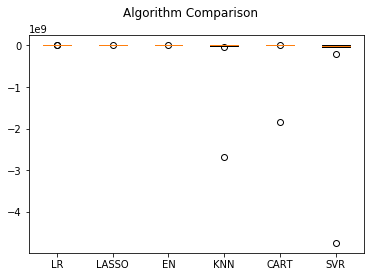

In [73]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [85]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
# pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
# pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
# pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR',SVR())])))

In [86]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#     print("RMSE: %.3f" % (math.sqrt(abs(cv_results.mean()))))

ScaledLR: -0.000000 (0.000000)
ScaledLASSO: -0.000000 (0.000000)
ScaledEN: -0.000000 (0.000000)


In [76]:
results

[array([-1.76991550e-20, -1.78346558e-21, -4.76548734e-22, -4.91459378e-22,
        -1.10718838e-21, -8.61251897e-22, -1.33795751e-21, -6.23579096e-22,
        -2.46384737e-22, -2.25784343e-22]),
 array([ -15347.825701  , -189235.12887074,  -73880.57488155,
         -24043.97653174,  -14866.25757397,  -12340.95647885,
         -39853.82095786,   -7863.94556402,   -5181.98778434,
          -6383.41712349]),
 array([-16733217.53135702,  -3442336.61974144,  -1152295.35352573,
          -332213.38812121,   -248278.21486488,   -187961.83823544,
          -609863.20757641,   -220717.33140251,   -279056.5239558 ,
          -620581.75701461])]

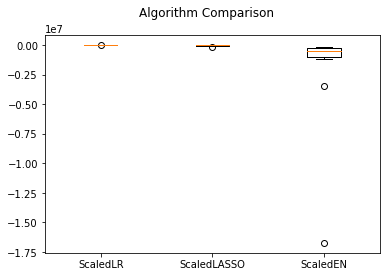

In [77]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## TEST

In [125]:
test_log = test_LA.copy()
test_log.shape

(1451, 30)

In [128]:
print(test_log[test_log['BLACK_CY']==0])
print(test_log[test_log['OTHRACE_CY']==0])

     regionabbr        subregion  Provider_Count  ASIAN_CY  AMERIND_CY  \
1609         NE  Frontier County               1       4.0         8.0   

      AVGHHSZ_CY  AVGHINC_CY  BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  \
1609        2.23     66803.0       0.0      1837.0        58.0       44.0   

      MINORITYCY  OTHRACE_CY   PCI_CY  POPDENS_CY  UNEMPRT_CY  WHITE_CY  \
1609       108.0        11.0  29015.0         2.7         1.6    2577.0   

      SMCOLL_CY  ASSCDEG_CY  BACHDEG_CY  GRADDEG_CY  X8001_A  X8002_A  \
1609      476.0       306.0       226.0       145.0  5803.53  3748.61   

      X8013_A  X8018_A  X8019_A  X8024_A  X8032_A  X13002_A  X13004_A  
1609   795.94  2054.92  1057.64    76.36   160.17     364.6   5991.35  
     regionabbr    subregion  Provider_Count  ASIAN_CY  AMERIND_CY  \
1478         WV  Wirt County               2      11.0        13.0   

      AVGHHSZ_CY  AVGHINC_CY  BLACK_CY  EDUCBASECY  HISPPOP_CY  MEDAGE_CY  \
1478        2.39     52863.0       9

In [129]:
test_log['BLACK_CY'].replace(0.0, np.nan, inplace=True)
test_log['OTHRACE_CY'].replace(0.0, np.nan, inplace=True)


In [130]:
test_log.dropna(inplace=True)
test_log.shape

(1449, 30)

In [ ]:
train_x_LA = test_log.iloc[:,3:]
train_y_LA = test_log.iloc[:,2]
train_x.head()

In [131]:
# Subset important predictors
train_x_lasso = test_log.loc[:,imp_coef.index]
train_x_lasso.head()

GRADDEG_CY  OTHRACE_CY  SMCOLL_CY  ASSCDEG_CY  POPDENS_CY  AMERIND_CY  \
16    151277.0     44229.0   161014.0     78418.0      2269.8     10369.0   
17    124886.0    117203.0   182434.0     60266.0     11869.9      7744.0   
18    121598.0    130941.0   169667.0     63393.0      1597.1      6681.0   
20    198145.0     93346.0   146621.0     76632.0      4805.5      3725.0   
22    164681.0     94797.0    93481.0     41665.0      2269.6      4721.0   

    X8013_A  ASIAN_CY  UNEMPRT_CY  BLACK_CY  MEDAGE_CY  HISPPOP_CY  \
16   677.71   95783.0         3.9  166746.0       37.4     88522.0   
17   450.21  118378.0        10.8  673651.0       34.9    243837.0   
18   818.85  196318.0         4.0  102526.0       39.3    296673.0   
20   941.09  135762.0         5.4  168075.0       42.4    242411.0   
22   938.77   62160.0         5.9  148832.0       41.2    250091.0   

    AVGHHSZ_CY  X13004_A  BACHDEG_CY  
16        2.39   9795.97    268077.0  
17        2.47   5711.26    180690.0  
18        2.80  12428.76    208002.0  
20        2.98  14346.36    239124.0  
22        2.67  14194.42    165761.0

In [132]:
train_x_lasso.describe()

GRADDEG_CY     OTHRACE_CY      SMCOLL_CY    ASSCDEG_CY  \
count    1449.000000    1449.000000    1449.000000   1449.000000   
mean    10128.107660    6548.627329   17419.558316   7323.707384   
std     22033.334066   19083.993565   27987.293063  11860.597181   
min        44.000000       3.000000     159.000000     38.000000   
25%       855.000000     217.000000    3010.000000   1250.000000   
50%      2170.000000     874.000000    6500.000000   2760.000000   
75%      7867.000000    3768.000000   18069.000000   7444.000000   
max    198145.000000  248928.000000  204219.000000  97865.000000   

         POPDENS_CY    AMERIND_CY      X8013_A       ASIAN_CY   UNEMPRT_CY  \
count   1449.000000   1449.000000  1449.000000    1449.000000  1449.000000   
mean     234.020014   1426.220842   609.760904    5081.223602     4.843547   
std      661.226014   4224.033664    93.919109   16763.526065     2.415317   
min        0.100000      6.000000   380.050000       1.000000     0.300000   
25%       28.900000    126.000000   547.850000     121.000000     3.300000   
50%       66.500000    332.000000   597.290000     360.000000     4.500000   
75%      177.600000   1066.000000   658.950000    2025.000000     5.900000   
max    11869.900000  56871.000000  1062.380000  221003.000000    27.000000   

            BLACK_CY    MEDAGE_CY     HISPPOP_CY   AVGHHSZ_CY      X13004_A  \
count    1449.000000  1449.000000    1449.000000  1449.000000   1449.000000   
mean    15706.814355    40.986266   16874.378882     2.510945   6403.292008   
std     47228.725580     5.305255   46393.778682     0.224599   1801.593080   
min         1.000000    24.500000      31.000000     1.960000   3121.710000   
25%       286.000000    37.800000     704.000000     2.370000   5212.780000   
50%      1940.000000    40.900000    2495.000000     2.470000   6025.960000   
75%     10663.000000    44.000000    9865.000000     2.600000   7143.560000   
max    673651.000000    59.200000  536176.000000     4.340000  15808.810000   

          BACHDEG_CY  
count    1449.000000  
mean    16285.926846  
std     33020.206467  
min        79.000000  
25%      1668.000000  
50%      4166.000000  
75%     13435.000000  
max    268077.000000

In [134]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
# from scipy.stats import log
from numpy import log
sc_data = StandardScaler()
train_x_std_lasso = sc_data.fit_transform(train_x_lasso)
# train_y_box = boxcox(test_LA.iloc[:,2], lmbda=0)
train_y_box = np.log(test_log.iloc[:,2])

# train_y_box,fitted_lambda = stats.boxcox(train_y)
# train_y_box = pd.Series(stats.boxcox(train_y))

In [145]:
train_x_log = np.log(train_x_lasso)
train_x_log.head()

GRADDEG_CY  OTHRACE_CY  SMCOLL_CY  ASSCDEG_CY  POPDENS_CY  AMERIND_CY  \
16   11.926868   10.697136  11.989247   11.269809    7.727447    9.246576   
17   11.735157   11.671663  12.114144   11.006523    9.381761    8.954674   
18   11.708476   11.782502  12.041593   11.057109    7.375945    8.807023   
20   12.196754   11.444068  11.895606   11.246770    8.477516    8.222822   
22   12.011766   11.459493  11.445513   10.637417    7.727359    8.459776   

     X8013_A   ASIAN_CY  UNEMPRT_CY   BLACK_CY  MEDAGE_CY  HISPPOP_CY  \
16  6.518719  11.469840    1.360977  12.024227   3.621671   11.391006   
17  6.109714  11.681638    2.379546  13.420467   3.552487   12.404255   
18  6.707901  12.187491    1.386294  11.537872   3.671225   12.600386   
20  6.847039  11.818659    1.686399  12.032166   3.747148   12.398390   
22  6.844571  11.037467    1.774952  11.910573   3.718438   12.429580   

    AVGHHSZ_CY  X13004_A  BACHDEG_CY  
16    0.871293  9.189726   12.499030  
17    0.904218  8.650195   12.104538  
18    1.029619  9.427768   12.245303  
20    1.091923  9.571252   12.384738  
22    0.982078  9.560604   12.018302

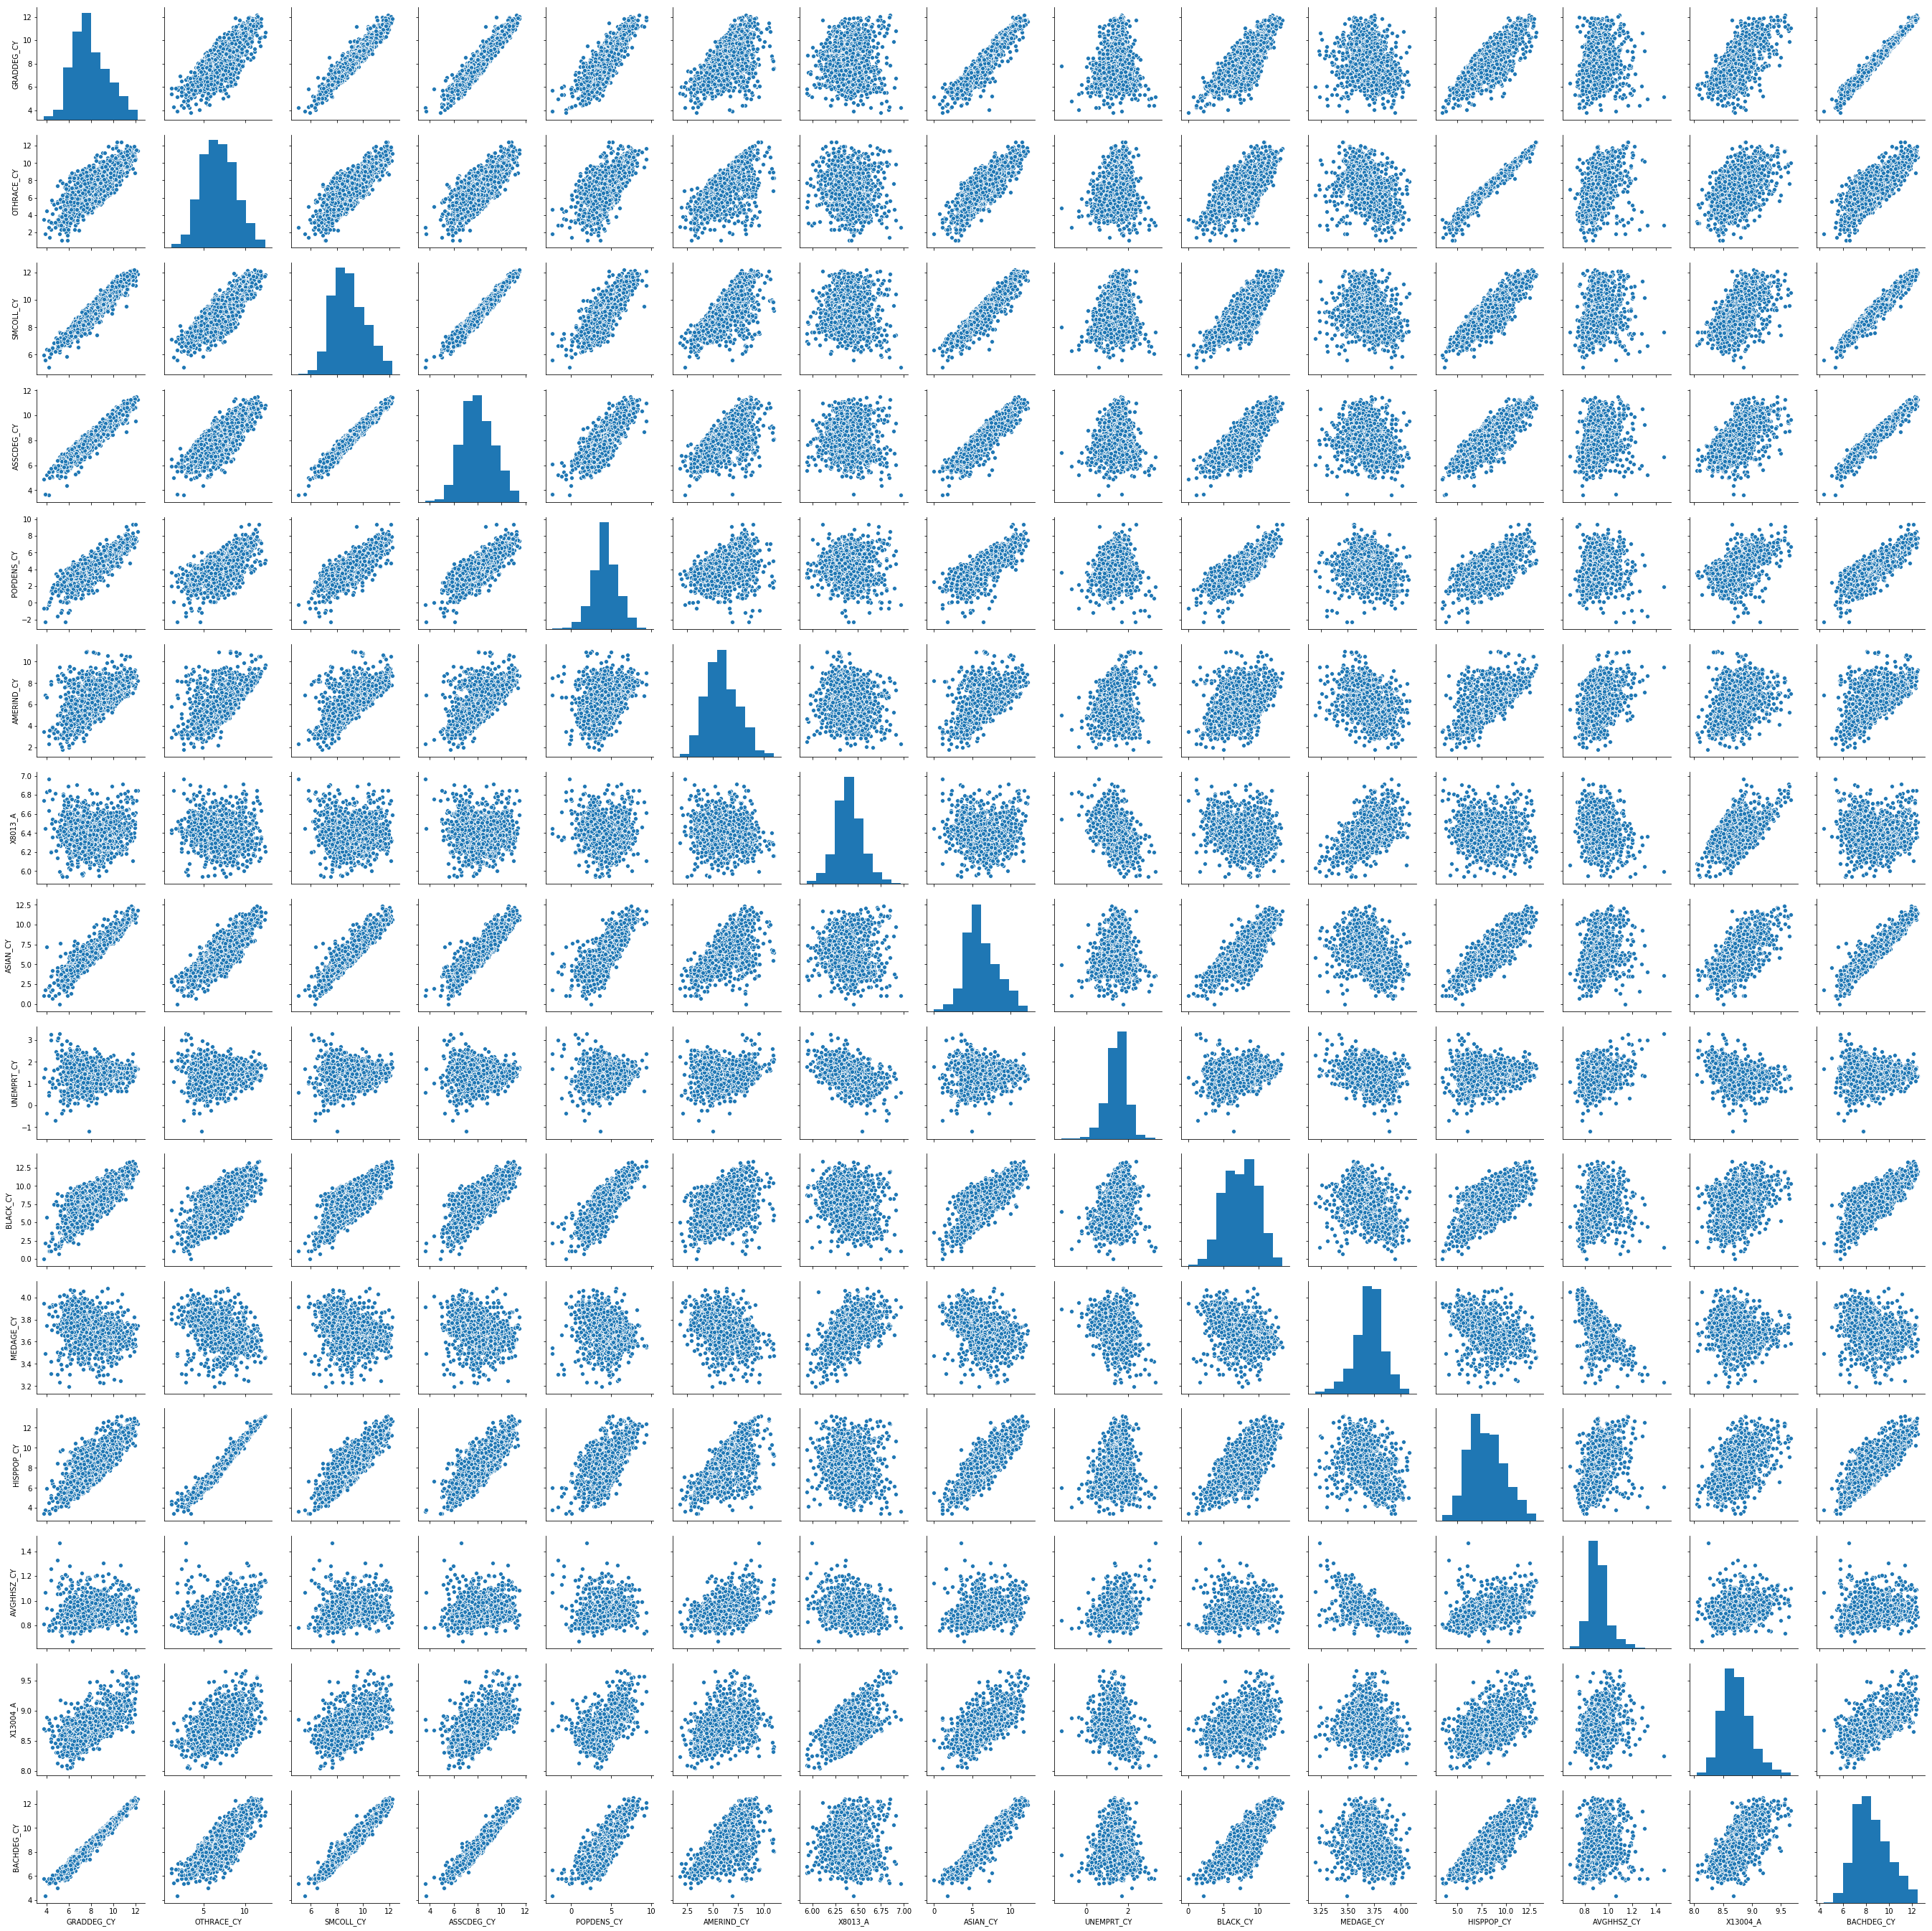

In [146]:
sns.pairplot(train_x_log)

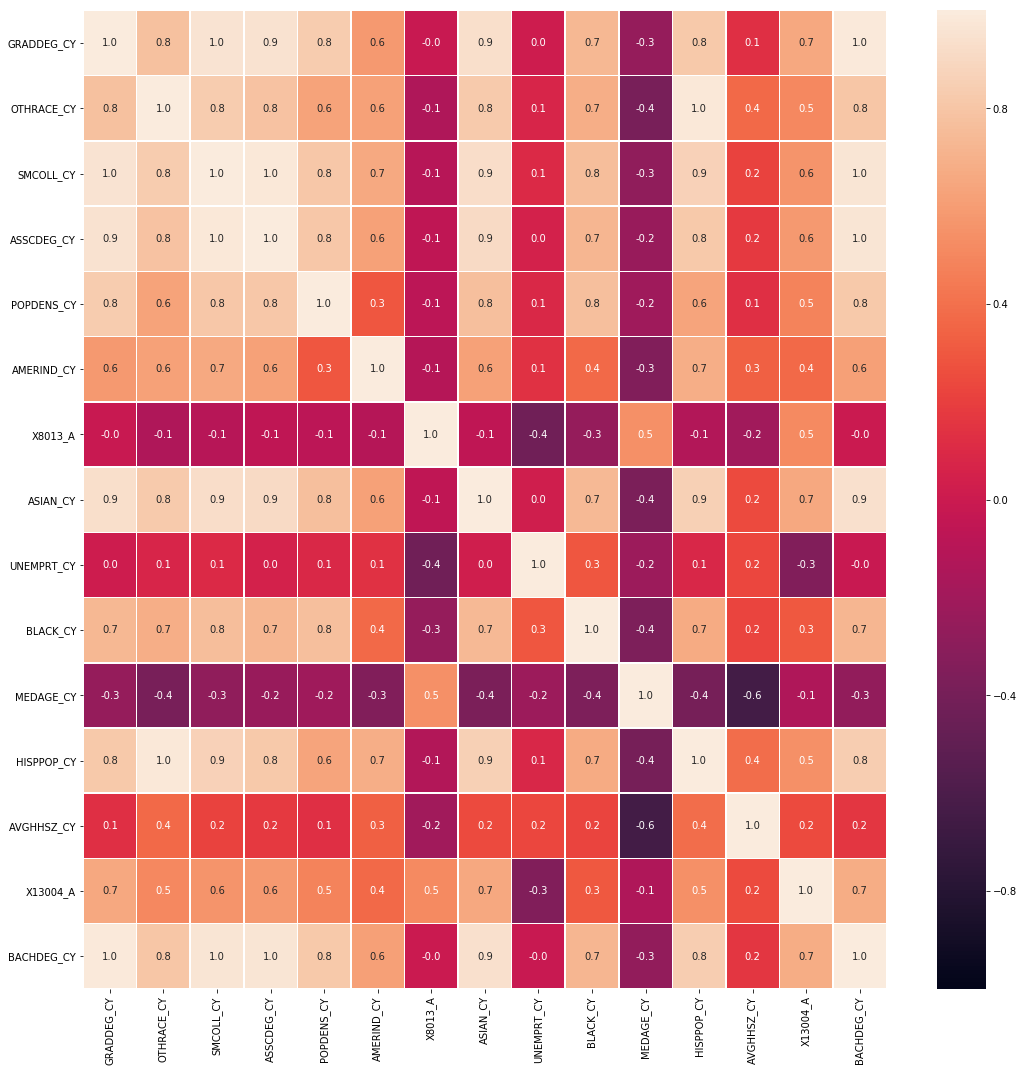

In [148]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_x_log.corr(), vmin=-1.0, vmax=1.0, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

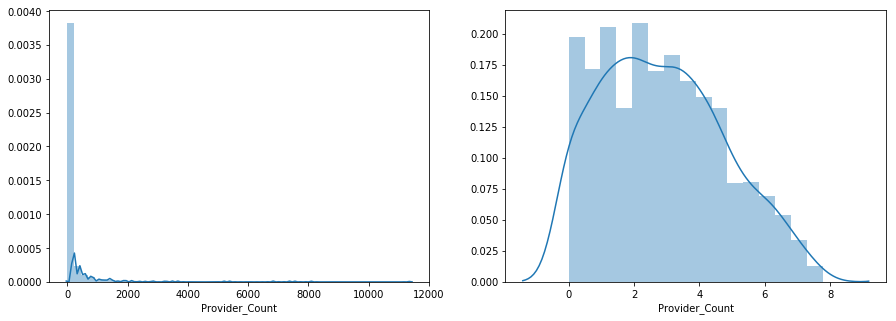

In [78]:
# Distribution of Rependent/Response variable
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_y_box, ax=ax2)
sns.distplot(train_y, ax=ax1)

In [137]:
X_train_lasso = sm.add_constant(train_x_log)
sm_ols_lasso = sm.OLS(train_y_box, X_train_lasso).fit() 

C:\Users\mohi9282\AppData\Local\Continuum\anaconda3\envs\arcgis\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [138]:
sm_ols_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Provider_Count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     579.4
Date:                Tue, 06 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:16:49   Log-Likelihood:                -1568.2
No. Observations:                1449   AIC:                             3168.
Df Residuals:                    1433   BIC:                             3253.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4359      1.282      1.900      0.058      -0.080       4.951
GRADDEG_CY     0.6685      0.078      8.615      0.000       0.516       0.821
OTHRACE_CY    -0.1678      0.051     -3.313      0.001      -0.267      -0.068
SMCOLL_CY      0.1609      0.111      1.452      0.147      -0.056       0.378
ASSCDEG_CY     0.1496      0.077      1.946      0.052      -0.001       0.300
POPDENS_CY     0.0121      0.028      0.436      0.663      -0.042       0.067
AMERIND_CY     0.0955      0.021      4.485      0.000       0.054       0.137
X8013_A       -0.5301      0.260     -2.041      0.041      -1.040      -0.021
ASIAN_CY       0.1656      0.033      5.087      0.000       0.102       0.229
UNEMPRT_CY     0.1150      0.051      2.246      0.025       0.015       0.215
BLACK_CY      -0.0441      0.017     -2.657      0.008      -0.077      -0.012
MEDAGE_CY     -0.9530      0.283     -3.367      0.001      -1.508      -0.398
HISPPOP_CY     0.1509      0.064      2.375      0.018       0.026       0.276
AVGHHSZ_CY    -2.8818      0.392     -7.354      0.000      -3.651      -2.113
X13004_A       0.0755      0.205      0.367      0.713      -0.327       0.478
BACHDEG_CY    -0.0147      0.112     -0.131      0.896      -0.235       0.206
==============================================================================
Omnibus:                       35.107   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.138
Skew:                          -0.076   Prob(JB):                     7.96e-17
Kurtosis:                       4.098   Cond. No.                     1.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The expected change in sqrt(y=Provider Count) with respect to a one-unit increase in Graduate Degree holding all other variables constant is 1.78. This means that for one-unit increase in Graduate Degree, the sqrt(y=Provider Count) will increase by .000037 holding all other predictors fixed.
1. GRADDEG_CY - The coefficient is 0.6685. 1% increase in Grad deg multiplies Provider Count by e^(0.6685*log(1.01)) = 0.843177 . This means that for 1% increase in graduate degree, Provider Count will increase by (1-.843177)*100 = 15.7%. 

This means that for 1 unit increase in graduate degree, Provider Count will increase by 0.0017% ((exp(0.0000168)-1)*100) holding all other predictors fixed. OR  for 1000 unit increase in graduate degree, Provider Count will increase by 1.7%. 

2. SMCOLL_CY - The coefficient is 3.67e-05. This means that for one-unit increase in people who attended some college, Provider Count will increase by 0.0037% holding all other predictors fixed. OR  for 1000 unit increase in other race, Provider Count will increase by 3.7%.

3. ASSCDEG_CY - The coefficient is 3.73e-05. This means that for one-unit increase in people with associates degree, Provider Count will increase by 0.0037% holding all other predictors fixed. OR  for 1000 unit increase in people with associates degree, Provider Count will increase by 3.7%.

4. AMERIND_CY - The coefficient is 2.28e-05. This means that for one-unit increase in American Indian population, Provider Count will increase by 0.0023% holding all other predictors fixed. OR  for 1000 unit increase in American Indian population, Provider Count will increase by 2.3%.

5. X8013_A - The coefficient is -0.0082. This means that for one-unit increase in average medicare payments, Provider Count will reduce by 0.82% holding all other predictors fixed. 

6. BLACK_CY - The coefficient is 2.686e-06. This means that for one-unit increase in Black population, Provider Count will reduce by 0.000268% holding all other predictors fixed. OR  for 1000 unit increase in Black population, Provider Count will reduce by 0.27%.

7. MEDAGE_CY - The coefficient is -0.0229. This means that for one-unit increase in Median Age, Provider Count will reduce by 2.3% holding all other predictors fixed. 

8. AVGHHSZ_CY - The coefficient is -2.4389. This means that for one-unit increase in Avg. Household Size, Provider Count will reduce by 1046% holding all other predictors fixed. 

9. X13004_A - The coefficient is -0.0007. This means that for one-unit increase in average pension and social security, Provider Count will increase by 0.07% holding all other predictors fixed.
 

In [139]:
# Calculate RMSE of new model
pred_val = sm_ols_lasso.fittedvalues.copy()
new_rmse = rmse(train_y_box, pred_val)
new_rmse

0.7141465975789364

In [140]:
sm_ols_lasso.conf_int(alpha=0.05, cols=None)

0         1
const      -0.079639  4.951417
GRADDEG_CY  0.516264  0.820707
OTHRACE_CY -0.267145 -0.068438
SMCOLL_CY  -0.056459  0.378283
ASSCDEG_CY -0.001197  0.300379
POPDENS_CY -0.042343  0.066566
AMERIND_CY  0.053719  0.137253
X8013_A    -1.039587 -0.020648
ASIAN_CY    0.101763  0.229488
UNEMPRT_CY  0.014580  0.215475
BLACK_CY   -0.076738 -0.011559
MEDAGE_CY  -1.508299 -0.397756
HISPPOP_CY  0.026271  0.275592
AVGHHSZ_CY -3.650535 -2.113144
X13004_A   -0.327494  0.478481
BACHDEG_CY -0.235033  0.205579

#### Verify Assumptions

In [141]:
# Assumptions
# pred_val = sm_ols_lasso.fittedvalues.copy()
# true_val = train_y_log
residual = sm_ols_lasso.resid

((array([-3.30301987, -3.04565945, -2.90252966, ...,  2.90252966,
          3.04565945,  3.30301987]),
  array([-2.6009752 , -2.51922442, -2.42938312, ...,  2.56683613,
          2.5959071 ,  2.64358674])),
 (0.7111478447648172, -8.909609260885418e-14, 0.9938034724415346))

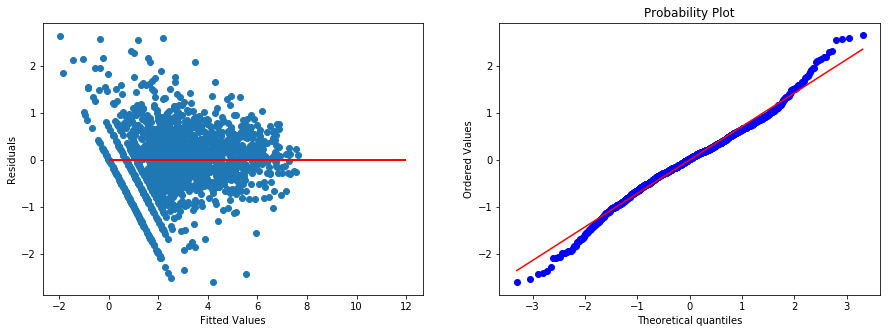

In [142]:
import scipy as sp
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Residuals vs Fitted
ax1.scatter(pred_val, residual)
ax1.hlines(y=0, xmin=0, xmax=12, linewidth=2, color='r')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# QQ plot
sp.stats.probplot(residual, plot=ax2, fit=True)

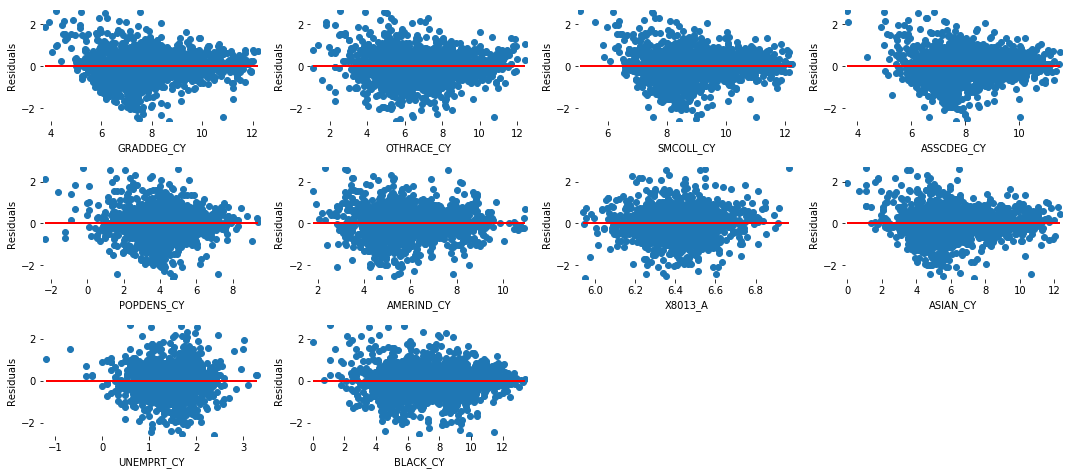

In [151]:
states = train_x_log.columns
fig = plt.figure(figsize=(15, 15))

for sp in range(0,10):
    mini = min(train_x_log.loc[:,states[sp]])
    maxi = max(train_x_log.loc[:,states[sp]])
    ax = fig.add_subplot(7,4,sp+1)
    ax.scatter(train_x_log.loc[:,states[sp]], residual)
    ax.hlines(y=0, xmin=mini, xmax=maxi, linewidth=2, color='r')
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Residuals')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

In [150]:
states

Index(['GRADDEG_CY', 'OTHRACE_CY', 'SMCOLL_CY', 'ASSCDEG_CY', 'POPDENS_CY',
       'AMERIND_CY', 'X8013_A', 'ASIAN_CY', 'UNEMPRT_CY', 'BLACK_CY',
       'MEDAGE_CY', 'HISPPOP_CY', 'AVGHHSZ_CY', 'X13004_A', 'BACHDEG_CY'],
      dtype='object')

In [34]:
regions = ['WY','VT']
for reg in regions:
#     print(type(reg))
    r = "'"+reg+"'"
#     print(type(r))
    c = provider_data_layer.query(where="user_region="+r, return_count_only=True)
    print(c)
# provider_data_layer.query(where="user_region in ('WY', 'VT')", return_count_only=True)
#     print(c)

12770
12840


In [27]:
provider_data_layer.query(where="regionabbr='CA'", return_count_only=True)


679881

In [28]:
provider_data_layer.query(where="user_region='CA'", return_count_only=True)

678482